In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join, vstack
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
import scipy.stats as stats
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map



1.4.4
1.4.4


/tmp/ipykernel_22056/1967780778.py:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#from pyFIT3D.modelling.stellar import SSPModels

In [3]:
import matplotlib.colors as mcolors
color_cm_now = vel_map()
f = open('/home/sanchez/sda2/code/colortables/CLC_vmap.csv', 'w')
for i in range(color_cm_now.N):
    val=color_cm_now(i)
    val_str=f'{val[0]},{val[1]},{val[2]},{val[3]}\n'
#    f.write("Hello, World!\n")
#    print(val_str)
    f.write(val_str);
f.close()
#color_list = [mcolors.rgb2hex(color_cm_now(i)) for i in range(color_cm_now.N)]
#print(color_list)

In [4]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [5]:
hdu=fits.open("SDSS17Pipe3D_v3_1_1.fits")
table=Table(hdu[1].data)
ssp=hdu[2].data
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}
# tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')
#tab.add_column(tab['u-g']+tab['g-r']+tab['r-i']+tab['i-z'],name='u-z')
#tab_all=tab

#
# Velocity dispersions matched to the DAP ones
#

s_res_Ha=45
x_par=np.sqrt((table['vel_disp_Ha_1Re'])**2-s_res_Ha**2)
sig_res=75
y_par=np.sqrt((table['vel_disp_ssp_1Re'])**2+sig_res**2)*1.15-41
table.add_column(x_par,name='vel_disp_Ha_1Re_cor')
table.add_column(y_par,name='vel_disp_ssp_1Re_cor')






9828


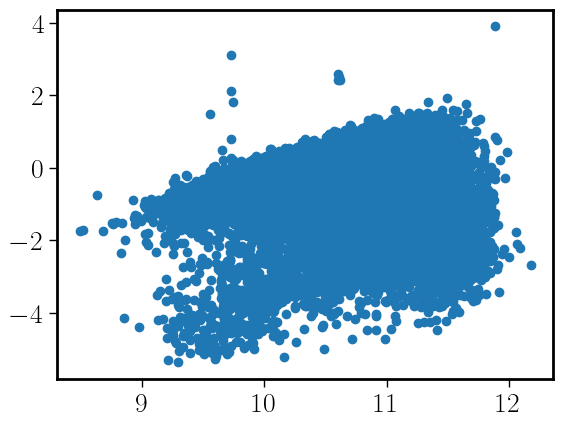

In [6]:
qc_mask = table['QCFLAG'] == 0
tab=table[qc_mask]
plt.scatter(tab['log_Mass'],tab['log_SFR_Ha'])
print(len(tab))

In [7]:
tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')
tab.add_column(tab['u-g']+tab['g-r']+tab['r-i']+tab['i-z'],name='u-z')
tab_all=tab

In [9]:
print(np.nanmean(tab['nsa_redshift']))

0.04529747265972507


In [8]:
qc_warning = table['QCFLAG'] >1
qc_bad = table['QCFLAG'] == 1
print (len(table))
print (len(tab))
print (len(table[qc_warning]))
print (len(table[qc_bad]))

10220
9828
386
6


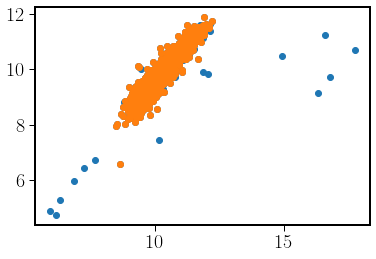

In [9]:
plt.scatter(table['log_Mass'],table['log_Mass_phot'])
plt.scatter(tab['log_Mass'],tab['log_Mass_phot'])

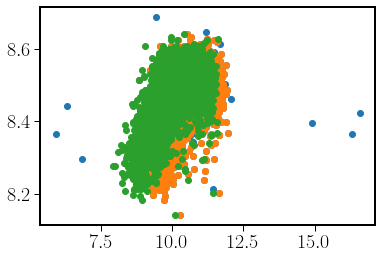

In [10]:
plt.scatter(table['log_Mass'],table['OH_Mar13_O3N2_Re_fit'])
plt.scatter(tab['log_Mass'],tab['OH_Mar13_O3N2_Re_fit'])#OH_Re_fit_O3N2OH_Mar13_O3N2_Re_fit
plt.scatter(tab['log_Mass_phot'],tab['OH_Mar13_O3N2_Re_fit'])#OH_Re_fit_O3N2OH_Mar13_O3N2_Re_fit

In [11]:
print(tab.columns)

<TableColumns names=('name','plate','ifudsgn','plateifu','mangaid','objra','objdec','log_SFR_Ha','FoV','Re_kpc','e_log_Mass','e_log_SFR_Ha','log_Mass','log_SFR_ssp','log_NII_Ha_cen','e_log_NII_Ha_cen','log_OIII_Hb_cen','e_log_OIII_Hb_cen','log_SII_Ha_cen','e_log_SII_Ha_cen','log_OII_Hb_cen','e_log_OII_Hb_cen','EW_Ha_cen','e_EW_Ha_cen','ZH_LW_Re_fit','e_ZH_LW_Re_fit','alpha_ZH_LW_Re_fit','e_alpha_ZH_LW_Re_fit','ZH_MW_Re_fit','e_ZH_MW_Re_fit','alpha_ZH_MW_Re_fit','e_alpha_ZH_MW_Re_fit','Age_LW_Re_fit','e_Age_LW_Re_fit','alpha_Age_LW_Re_fit','e_alpha_Age_LW_Re_fit','Age_MW_Re_fit','e_Age_MW_Re_fit','alpha_Age_MW_Re_fit','e_alpha_Age_MW_Re_fit','Re_arc','DL','DA','PA','ellip','log_Mass_gas','vel_sigma_Re','e_vel_sigma_Re','log_SFR_SF','log_SFR_D_C','OH_O3N2_cen','e_OH_O3N2_cen','OH_N2_cen','e_OH_N2_cen','OH_ONS_cen','e_OH_ONS_cen','OH_R23_cen','e_OH_R23_cen','OH_pyqz_cen','e_OH_pyqz_cen','OH_t2_cen','e_OH_t2_cen','OH_M08_cen','e_OH_M08_cen','OH_T04_cen','e_OH_T04_cen','OH_dop_cen','e_OH_do

In [12]:
#print(tab['best_type'])
tab['best_type'][tab['best_type_n']==-2]='CD'
tab['best_type'][tab['best_type_n']==-1]='E'
tab['best_type'][tab['best_type_n']==0]='S0'
tab['best_type'][tab['best_type_n']==1]='Sa'
tab['best_type'][tab['best_type_n']==2]='Sab'
tab['best_type'][tab['best_type_n']==3]='Sb'
tab['best_type'][tab['best_type_n']==4]='Sbc'
tab['best_type'][tab['best_type_n']==5]='Sc'
tab['best_type'][tab['best_type_n']==6]='Scd'
tab['best_type'][tab['best_type_n']==7]='Sd'
tab['best_type'][tab['best_type_n']==8]='Sdm'
tab['best_type'][tab['best_type_n']==9]='Sm'
tab['best_type'][tab['best_type_n']==10]='Irr'
# Check
print(tab['name'][tab['best_type_n']==10])


       name      
-----------------
 manga-10215-6102
 manga-10217-9102
manga-10218-12704
 manga-10225-6102
 manga-10508-6103
manga-10841-12702
manga-11744-12704
 manga-11941-9101
 manga-11942-6102
manga-11945-12703
              ...
 manga-9089-12703
  manga-9500-3702
 manga-9504-12705
  manga-9509-3702
 manga-9513-12701
 manga-9872-12704
  manga-9876-3702
  manga-9881-9102
  manga-9885-6101
  manga-9886-3701
 manga-9892-12702
Length = 62 rows


In [13]:
print(tab['name'][tab['best_type_n']==-2])

      name      
----------------
manga-11968-6103
 manga-8144-3703
 manga-8147-3702
 manga-8241-6101
 manga-8274-9102
 manga-8327-9102
 manga-8563-3701
 manga-8563-6102


-0.2822934640187387 0.17194623176959814


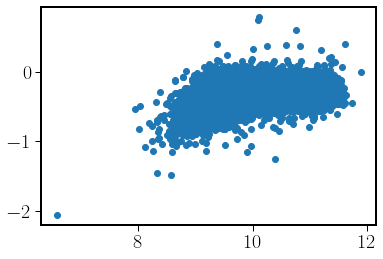

In [14]:
#tab.add_column(np.log10(tab['nsa_mstar']),name='log_Mass_nsa')

plt.scatter(tab['log_Mass_phot'],tab['log_Mass_phot']-tab['log_Mass'])
print(np.mean(tab['log_Mass_phot']-tab['log_Mass']),np.std(tab['log_Mass_phot']-tab['log_Mass']))

-0.13164994936946564 0.19775163912154725


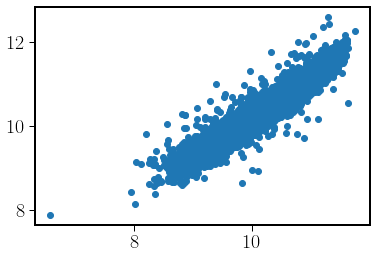

In [15]:
#tab.add_column(np.log10(tab['nsa_mstar']),name='log_Mass_nsa')

plt.scatter(tab['log_Mass_phot'],tab['nsa_mstar'])
print(np.nanmean(tab['log_Mass_phot']-tab['nsa_mstar']),np.nanstd(tab['log_Mass_phot']-tab['nsa_mstar']))

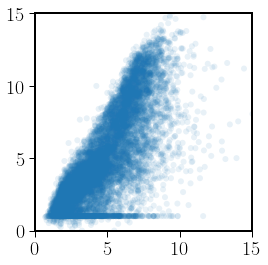

In [16]:
plt.scatter(tab['ML_int'],tab['ML_avg'],alpha=0.1,edgecolor='none')
plt.xlim(0,15)
plt.ylim(0,15)
plt.gca().set_aspect('equal', adjustable='box')

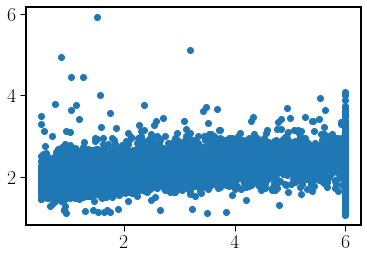

In [17]:
plt.scatter(tab['nsa_sersic_n_morph'],tab['C'])

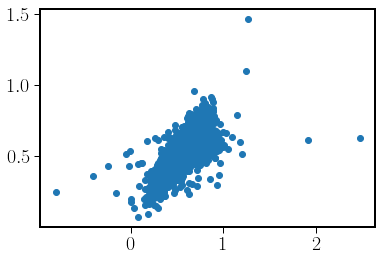

In [18]:
plt.scatter(tab['g-r'],tab['g_band_mag']-tab['r_band_mag'])

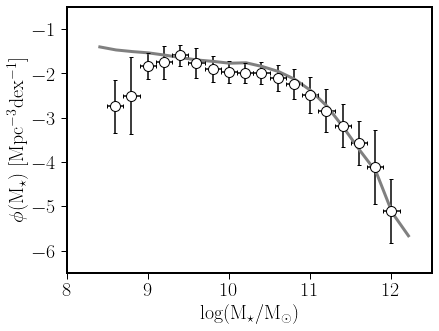

In [19]:
NSA_LF_tab=astro.io.ascii.read('tables/NSA_MF.dat')
#print(NSA_LF_tab)
fig, ax = plt.subplots(figsize=(6.5,5))
#ax.set_yscale('log')
n_bin=len(NSA_LF_tab)
mask_vol = tab['Vmax_w']>0
tab_V = tab[mask_vol]
h = 0.69
#hist, bin_edges = np.histogram(tab_V['log_Mass'], n_bin, weights=tab_V['Num_w'])
bins = np.arange(8.2,13.4,0.2)
#print(bins)
hist, bin_edges = np.histogram(tab_V['log_Mass'], bins=bins,
                               weights=tab_V['Vmax_w']/(h**3))
hist_min, bin_edges_min = np.histogram(tab_V['log_Mass'], bins=bins-0.15,
                               weights=tab_V['Vmax_w']/(h**3))
hist_max, bin_edges_max = np.histogram(tab_V['log_Mass'], bins=bins+0.15,
                               weights=tab_V['Vmax_w']/(h**3))

#x_bin = 0.5*(bin_edges[:-1] + bin_edges[1:])
x_bin=bin_edges[:-1]

#print(bin_edges,x_bin)
#ax.plot(x_bin)

#ax.plot(x_bin,np.log10(hist))
#ax.scatter(NSA_LF_tab['logMs']+0.21,np.log10(NSA_LF_tab['phi']))

ax.plot(NSA_LF_tab['logMs']+0.21,np.log10(NSA_LF_tab['phi']),\
        color='grey',linewidth=3)

err=np.abs(hist_max-hist_min)/hist
val=np.nanmean(err[hist>0])
ax.errorbar(x_bin,np.log10(hist),xerr=0.1,yerr=0.2*(err+val),fmt='o',ecolor='black',mfc='white', mec='black',ms=10,capsize=2)

ax.set_xlim([8.0,12.5])
ax.set_ylim([-6.5,-0.5])
ax.set_xlabel(r'log(M$_\star$/M$_\odot$)')
ax.set_ylabel(r'$\phi$(M$_\star$) [Mpc$^{-3}$dex$^{-1}$]')
fig.tight_layout()
fig.savefig("Vol_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#print(bin_edges)
#print(np.mean(tab_V['Vmax_w']))

In [20]:
# tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')

In [21]:
# tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')
#tab.add_column(tab['u-g']+tab['g-r']+tab['r-i']+tab['i-z'],name='u-z')
#tab_all=tab

In [22]:
#tab.add_column(tab['r_band_abs_mag']-tab['r-i']-tab['i-z'],name='z_abs')

#tab_all=tab

0 -2 10 13
1 -2 10 13
2 -2 10 13
3 -2 10 13
4 -2 10 13
5 -2 10 13
6 -2 10 13
7 -2 10 13
8 -2 10 13
9 -2 10 13
10 -2 10 13
11 -2 10 13
12 -2 10 13


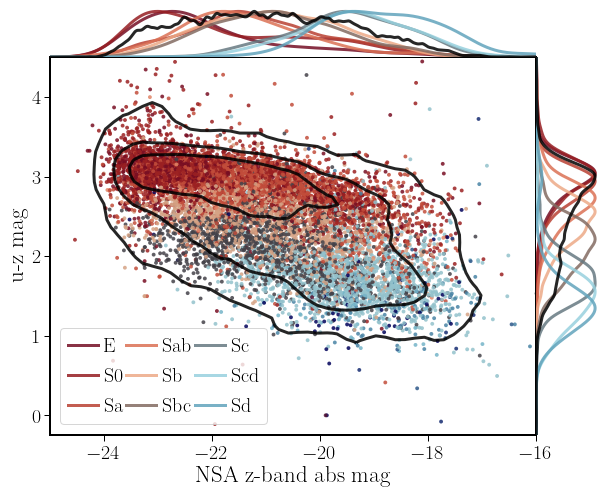

In [23]:
def plot_2Dhist(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(9,7))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    ax.scatter(x_par, y_par, s=size_scatter*3, c=z_par,\
               vmin=z_min,vmax=z_max,alpha=alpha,edgecolor='none',cmap=color_cm_now,\
               rasterized=True,label=label)
    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=3,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    fig.tight_layout()
    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

morph_list=[]
for key, value in morph.items():
    temp = value
    morph_list.append(temp)
    
plot_2Dhist(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
            x_min=-25,x_max=-16,y_min=-0.25,y_max=4.5,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None,\
            reverse=1)#'Spectral_r')

In [24]:
tab_all['OZ_Ho']=tab_all['OH_Ho_Re_fit']-8.67-tab_all['ZH_LW_Re_fit']

0 -2 10 13
1 -2 10 13
2 -2 10 13
3 -2 10 13
4 -2 10 13
5 -2 10 13
6 -2 10 13
7 -2 10 13
8 -2 10 13
9 -2 10 13
10 -2 10 13
11 -2 10 13
12 -2 10 13


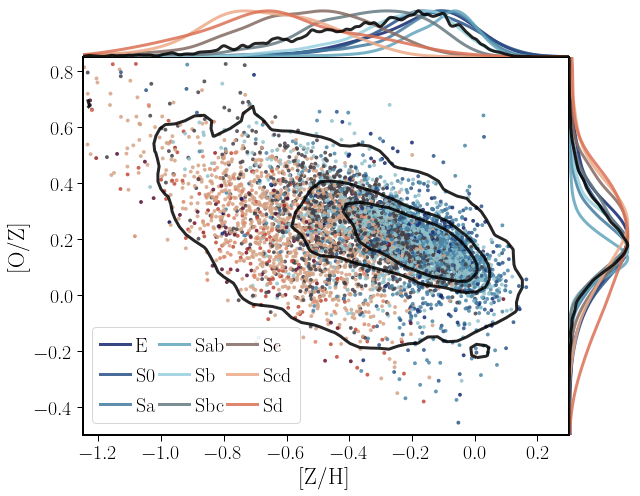

In [25]:
x_par=tab['ZH_LW_Re_fit']
y_par=tab['OZ_Ho']
z_par=tab['best_type_n']
mask_par = (x_par>-2) & (x_par<0.5) & (y_par>-2) & (y_par<2)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-1.25,x_max=0.3,y_min=-0.5,y_max=0.85,z_min=-2,z_max=10,c_main='black',label='MPL-11',\
            x_label=r'[Z/H]',y_label=r'[O/Z]',figname='OZ_Ho',alpha=0.85,\
            size_scatter=5.0,n_zbins=13,z_lim=80,labels_zbins=morph_list,color_cm_now=None)

0 -0.5 0.8 4
1 -0.5 0.8 4
2 -0.5 0.8 4
3 -0.5 0.8 4


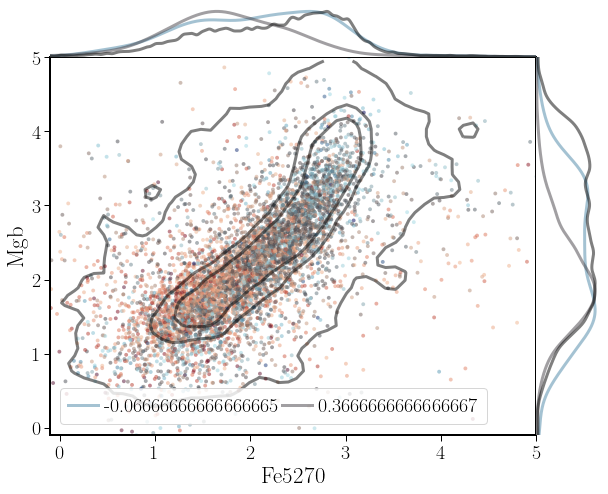

In [26]:
#tab['Mgb_Re_fit']*(0.72*tab['Fe5270_Re_fit']

x_par=tab['Fe5270_Re_fit']
y_par=tab['Mgb_Re_fit']
z_par=tab['OZ_Ho']
mask_par = (x_par>-3) & (x_par<8) & (y_par>-3) & (y_par<8)
plot_2Dhist(x_par=x_par[mask_par],y_par=y_par[mask_par],z_par=z_par[mask_par],\
            x_min=-0.1,x_max=5,y_min=-0.1,y_max=5,z_min=-0.5,z_max=0.8,c_main='black',label='MPL-11',\
            x_label=r'Fe5270',y_label=r'Mgb',figname='OZ_Ho',alpha=0.5,\
            size_scatter=5.0,n_zbins=4,color_cm_now=None)

In [27]:
get_mag="tables/get_mag_cubes_v2_4_3.csv";#tables/SDSS15Pipe3D_v2_5_3.csv"
col_mag=header_columns(get_mag,2)
for ind,cols in enumerate(col_mag):
    col_mag[ind]=cols.replace(',','')
    col_mag[ind]='DR15_'+col_mag[ind]
    
tab_DR15_mag=ascii.read(get_mag, delimiter=',', guess=True, comment='\s*#', names=col_mag,\
                      fill_values=[('BAD', np.nan)])
tab_DR15_mag.rename_column('DR15_name-obj','name')
list_columns(tab_DR15_mag.columns)

name              DR15_i1           DR15_Y            DR15_SN2          
DR15_redshift     DR15_i2           DR15_Re           DR15_error_SN1    
DR15_error        DR15_i3           DR15_error1       DR15_Re1          
DR15_u            DR15_B            DR15_mean         DR15_error4       
DR15_u1           DR15_B1           DR15_sigma        DR15_B-V          
DR15_u2           DR15_B2           DR15_ellipticy    DR15_error5       
DR15_u3           DR15_B3           DR15_Pa           DR15_B-R          
DR15_g            DR15_V            DR15_R50          DR15_error6       
DR15_g1           DR15_V1           DR15_error2       DR15_log10        
DR15_g2           DR15_V2           DR15_R90          DR15_error7       
DR15_g3           DR15_V3           DR15_error3       DR15_nRe          
DR15_r            DR15_R            DR15_C            DR15_V-band       
DR15_r1           DR15_R1           DR15_e_C          DR15_error8       
DR15_r2           DR15_R2           DR15_SN        

In [28]:
#
# plot comp.
#

# v2.5.3

get_proc_elines="tables/get_proc_elines_MaNGA.DR15.csv";#tables/SDSS15Pipe3D_v2_5_3.csv"
col_proc_elines=header_columns(get_proc_elines,2)
for ind,cols in enumerate(col_proc_elines):
    col_proc_elines[ind]=cols.replace(',','')
    col_proc_elines[ind]='DR15_'+col_proc_elines[ind]
    
tab_DR15=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])
#tab_pe=tab_pe[tab_pe['name']==tab_pe['MaNGA_name']]
#print(len(tab_pe_test))
tab_DR15.rename_column('DR15_name','name')
#print(tab_DR15[tab_DR15['name']=='manga-11757-9102'])
#tab_DR15.add_column(tab['r,name='z_abs')


#print(len(tab_pe_test))
print(tab_DR15[tab_DR15['name']=='manga-10001-12701'])
#print(col_proc_elines)
#print(len(tab_DR15))






 DR15_MaNGA_name  DR15_nsa_redshift ...  DR15_e_F_Ha_cen   DR15_Re_kpc_Mass
----------------- ----------------- ... ------------------ ----------------
manga-10001-12701         0.0392074 ... 0.0461725118403084  4.1136808842339


In [29]:
tab_DR15=join(tab_DR15,tab_DR15_mag,keys=['name'],join_type='left')

#hdu_DR15=fits.open("tables/manga.Pipe3D_MPL-7.fits")
#tab_DR15=Table(hdu_DR15[1].data)
#print(tab_DR15.columns)
#tab_DR15.rename_column('mangaid','name')
#print(tab_DR15[tab_DR15['name']=='manga-10001-12701'])

In [30]:
tab_DR17_DR15=join(tab,tab_DR15,keys=['name'])#,join_type='right')

In [31]:
print(len(tab_DR15.columns))
print(len(tab_DR17_DR15.columns))


595
1135


In [32]:
list_columns(tab_DR17_DR15.columns)

name                                     flux_[SII]6730.82_Re_fit                 DR15_nx                                  DR15_e_NO_Re_fit_N2S2                    
plate                                    e_flux_[SII]6730.82_Re_fit               DR15_ny                                  DR15_alpha_NO_Re_fit_N2S2                
ifudsgn                                  flux_[SII]6730.82_alpha_fit              DR15_Re_kpc                              DR15_e_alpha_NO_Re_fit_N2S2              
plateifu                                 e_flux_[SII]6730.82_alpha_fit            DR15_mag_g                               DR15_cc_r_NO_N2S2                        
mangaid                                  flux_[ArIII]7135.8_Re_fit                DR15_log_Mass_corr                       DR15_sig_r_NO_N2S2                       
objra                                    e_flux_[ArIII]7135.8_Re_fit              DR15_Av_ssp_stats[2]                     DR15_OH_Re_fit_O3N2_EPM09                
objdec    

4556
4556
10.601130981838041


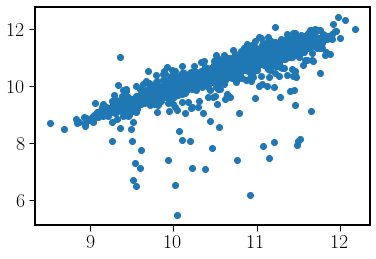

In [33]:
mask_now=tab_DR17_DR15['DR15_log_Mass']>0
print(len(tab_DR17_DR15['log_Mass']))
print(len(tab_DR17_DR15['log_Mass'][mask_now]))
print(np.mean(tab_DR17_DR15['log_Mass']))
#junk=ma.array(tab_DR17_DR15['log_mass'],mask=mask_now)
#print(len(junk))
#print(tab_DR17_DR15['log_mass']>0)
plt.scatter(tab_DR17_DR15['log_Mass'],tab_DR17_DR15['DR15_log_Mass'])

In [34]:
print(np.unique(tab_all['best_type_n']))

best_type_n
-----------
         -2
         -1
          0
          1
          2
          3
          4
          5
          6
          7
          8
          9
         10


E
0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


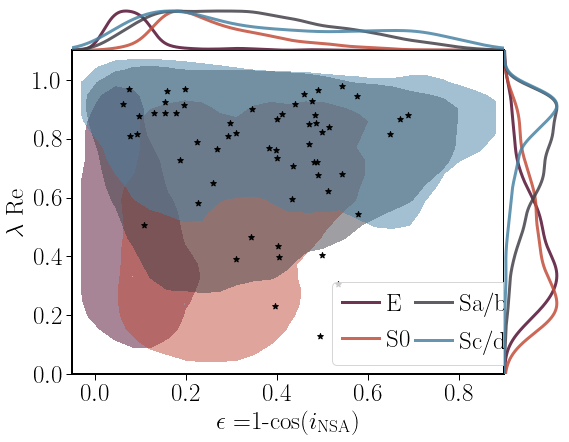

In [35]:
#
#
#
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

rc.update({'font.size': 25,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 25,\
           'ytick.labelsize' : 25})
           
def plot_2Dhist_map(x_par=tab_all['z_abs'],y_par=tab_all['u-z'],z_par=tab_all['best_type_n'],\
                x_min=-25,x_max=-16,y_min=0,y_max=4.5,z_min=-2,z_max=10,c_main='grey',label='MPL-11',\
                x_label='NSA z-band abs mag',y_label='u-z mag',figname='CMD_diag',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear'):

    fig = plt.figure(figsize=(8,6))
    left, width = 0.15, 0.75
    bottom, height = 0.15, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 1-(bottom+height)]
    rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)
    #ax.scatter(x_par, y_par, s=size_scatter*3, \
    #           alpha=0.1*alpha,edgecolor='none',color='black',\
    #           rasterized=True,label=label)
    
#    for indx in arange(n_zbins):
    
#    my_contour(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
#               nbins=50,title=label,linewidths=3,alpha=alpha)
#
# X-histogram 
#
    
    
    xx = np.linspace(x_min, x_max, 1000)
    kde_xx=stats.gaussian_kde(x_par)
    kde_xx.set_bandwidth(bw_method=kde_xx.factor / 5.)
    max_kde_xx=np.max(kde_xx(xx))
    
    delta_z=(z_max-z_min)/n_zbins
    Ncolors = min(colormap.N,n_zbins)
    mapcolors = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]
#    print(mapcolors)
    if (labels_zbins==None):
        labels_zbins=np.zeros(n_zbins)
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        print(indx,z_min,z_max,n_zbins)
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        xx = np.linspace(x_min, x_max, 1000)
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        if (len(x_par[mask_z_par])>0):
            kde=stats.gaussian_kde(x_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(x_par[mask_z_par])>z_lim):
                ax_histx.plot(xx,max_kde_xx*(kde(xx)/np.max(kde(xx))),\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
        new_cmap=truncate_colormap(colormap, minval=indx/n_zbins-0.05, maxval=indx/n_zbins+0.05, n=3)
        my_contourf(ax,x_par[mask_z_par],y_par[mask_z_par],\
                   x_min,x_max,y_min,y_max,c_color=mapcolors[indx],\
            nbins=25,title=label,linewidths=3,alpha=0.6*alpha,\
                   conts=[0.85,0.01],cmap=new_cmap,colors=1)
#    ax_histx.plot(xx,kde_xx(xx),color=c_main,linewidth=3,alpha=alpha)
    ax_histx.set_ylim(0,1.1*np.max(kde_xx(xx)))    

    
    
#
# Y-histogram 
#

    yy = np.linspace(y_min, y_max, 1000)
    kde_yy=stats.gaussian_kde(y_par)
    kde_yy.set_bandwidth(bw_method=kde_yy.factor / 2.)
    max_kde_yy=np.max(kde_yy(yy))
    for indx,z_bins in enumerate(np.linspace(z_min,z_max,n_zbins)):
        z_bin_min = z_bins-0.5*delta_z
        z_bin_max = z_bins+0.5*delta_z
        if (labels_zbins[indx]==0):
            labels_zbins[indx]=z_bins
        mask_z_par = (z_par>z_bin_min) & (z_par<=z_bin_max)
        #print(z_bins,len(x_par[mask_z_par]))
        if (len(y_par[mask_z_par])>0):
            kde=stats.gaussian_kde(y_par[mask_z_par])
            kde.set_bandwidth(bw_method=kde.factor / 1.)
            if(len(y_par[mask_z_par])>z_lim):
                ax_histy.plot(max_kde_yy*(kde(yy)/np.max(kde(yy))),yy,\
                              color=mapcolors[indx],linewidth=3,alpha=alpha,\
                              label=labels_zbins[indx])
    
    
#    ax_histy.plot(kde_yy(yy),yy,color=c_main,linewidth=3,alpha=alpha)
    ax_histy.set_xlim(0,1.1*np.max(kde_yy(yy)))

    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['bottom'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.get_xaxis().set_visible(False)
    ax_histx.get_yaxis().set_visible(False)

    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.spines['left'].set_visible(False)
    ax_histy.get_xaxis().set_visible(False)
    ax_histy.get_yaxis().set_visible(False)

    ax.set_xlabel(x_label, fontsize=25)
    ax.set_ylabel(y_label, fontsize=25)

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)

    handles, labels = ax_histx.get_legend_handles_labels()
    ax.legend(handles, labels,loc=(x_loc,y_loc),frameon=True,\
              handlelength=1.5,ncol=2,columnspacing=0.15,title=z_label)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    return fig,ax
#    fig.tight_layout()
#    fig.savefig(figname+".pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

##########
    
mask_now_in = (tab_all['Lambda_Re'] > -0.01) & (tab['nsa_inclination']>0)
morph_few = np.zeros(len(tab_all['best_type_n']))-10
morph_few[tab_all['best_type_n']==-1]=0
morph_few[tab_all['best_type_n']==0]=1
morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<5)]=2
morph_few[(tab_all['best_type_n']>4) &(tab_all['best_type_n']<9)]=3
#morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<7)]=2

mask_now = mask_now_in & (morph_few!=-10)

ab=np.sqrt((1-tab['ellip']**2-0.13**2)/(1-0.13**2))
ab=np.cos(tab['nsa_inclination']/180*np.pi)
#print(tab['nsa_inclination'])
#tab.add_column(
morph_list_few=['E','S0','Sa/b','Sc/d']
print(morph_list_few[0])
fig,ax=plot_2Dhist_map(x_par=(1-ab)[mask_now],y_par=tab_all['Lambda_Re'][mask_now],\
            z_par=morph_few[mask_now],\
            x_min=-0.05,x_max=0.9,y_min=0,y_max=1.1,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'$\epsilon=$1-cos($i_{\rm NSA}$)',y_label=r'$\lambda$ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.6)#'Spectral_r')
mask_irr = mask_now_in & (tab_all['best_type_n']>9)
ax.scatter((1-ab)[mask_irr],tab_all['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("lambda_ellip.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

E
0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


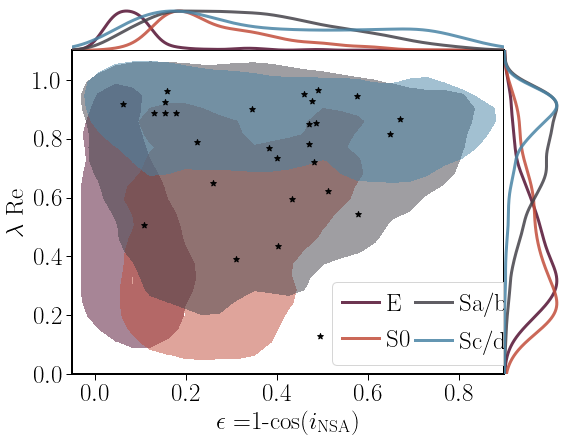

In [36]:
mask_now_in = (tab_DR17_DR15['Lambda_Re'] > -0.01) & (tab_DR17_DR15['nsa_inclination']>0)
morph_few = np.zeros(len(tab_DR17_DR15['best_type_n']))-10
morph_few[tab_DR17_DR15['best_type_n']==-1]=0
morph_few[tab_DR17_DR15['best_type_n']==0]=1
morph_few[(tab_DR17_DR15['best_type_n']>0) &(tab_DR17_DR15['best_type_n']<5)]=2
morph_few[(tab_DR17_DR15['best_type_n']>4) &(tab_DR17_DR15['best_type_n']<9)]=3
#morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<7)]=2

mask_now = mask_now_in & (morph_few!=-10)

ab=np.sqrt((1-tab_DR17_DR15['ellip']**2-0.13**2)/(1-0.13**2))
ab=np.cos(tab_DR17_DR15['nsa_inclination']/180*np.pi)
#print(tab['nsa_inclination'])
#tab.add_column(
morph_list_few=['E','S0','Sa/b','Sc/d']
print(morph_list_few[0])
fig,ax=plot_2Dhist_map(x_par=(1-ab)[mask_now],y_par=tab_DR17_DR15['Lambda_Re'][mask_now],\
            z_par=morph_few[mask_now],\
            x_min=-0.05,x_max=0.9,y_min=0,y_max=1.1,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'$\epsilon=$1-cos($i_{\rm NSA}$)',y_label=r'$\lambda$ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.6)#'Spectral_r')
mask_irr = mask_now_in & (tab_DR17_DR15['best_type_n']>9)
ax.scatter((1-ab)[mask_irr],tab_DR17_DR15['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("lambda_ellip_DR15.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


E
0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


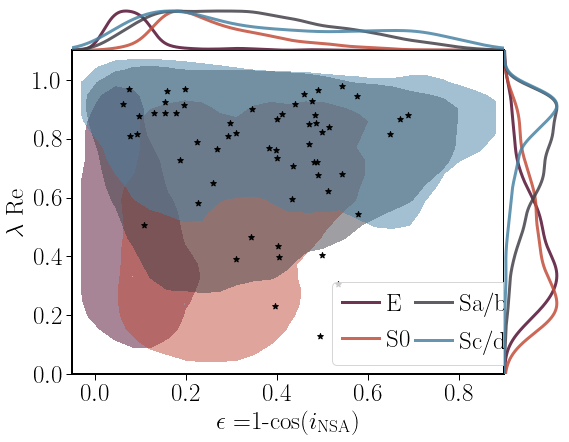

In [37]:
mask_now_in = (tab['Lambda_Re'] > -0.01) & (tab['nsa_inclination']>0)
morph_few = np.zeros(len(tab['best_type_n']))-10
morph_few[tab['best_type_n']==-1]=0
morph_few[tab['best_type_n']==0]=1
morph_few[(tab['best_type_n']>0) &(tab['best_type_n']<5)]=2
morph_few[(tab['best_type_n']>4) &(tab['best_type_n']<9)]=3
#morph_few[(tab_all['best_type_n']>0) &(tab_all['best_type_n']<7)]=2

mask_now = mask_now_in & (morph_few!=-10)

ab=np.sqrt((1-tab['ellip']**2-0.13**2)/(1-0.13**2))
ab=np.cos(tab['nsa_inclination']/180*np.pi)
#print(tab['nsa_inclination'])
#tab.add_column(
morph_list_few=['E','S0','Sa/b','Sc/d']
print(morph_list_few[0])
fig,ax=plot_2Dhist_map(x_par=(1-ab)[mask_now],y_par=tab['Lambda_Re'][mask_now],\
            z_par=morph_few[mask_now],\
            x_min=-0.05,x_max=0.9,y_min=0,y_max=1.1,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'$\epsilon=$1-cos($i_{\rm NSA}$)',y_label=r'$\lambda$ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.6)#'Spectral_r')
mask_irr = mask_now_in & (tab['best_type_n']>9)
ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("lambda_ellip_DR17.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


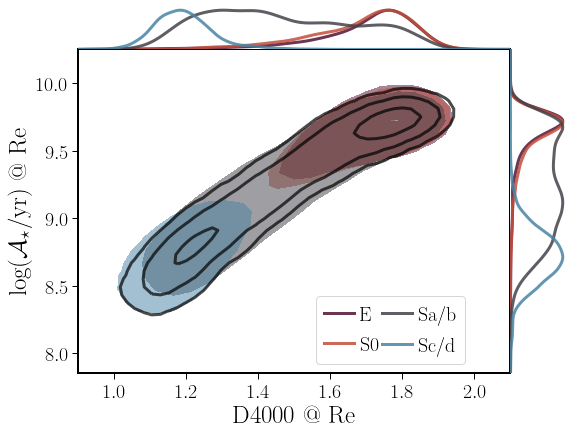

In [49]:
#print(morph_list_few[0])
mask_now = mask_now_in & (morph_few!=-10) & ( tab['D4000_Re_fit1'] > 0) & (tab['Age_LW_Re_fit']>0)
x=tab['D4000_Re_fit1'][mask_now]
y=tab['Age_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=0.9,x_max=2.1,y_min=7.85,y_max=10.25,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'D4000 @ Re',y_label=r'log($\mathcal{A}_\star$/yr) @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,0.9,2.1,7.5,10.5,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("D4000_Age.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


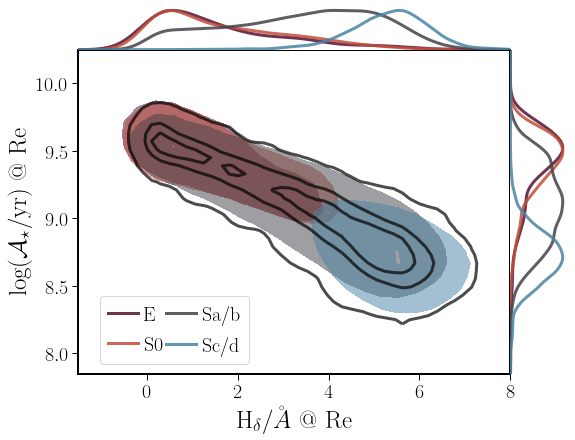

In [50]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Hd_Re_fit'] > 0) & (tab['Age_LW_Re_fit']>0)
x=tab['Hd_Re_fit'][mask_now]
y=tab['Age_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-1.5
x_max=8
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=7.85,y_max=10.25,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'H$_\delta$/$\AA$ @ Re',y_label=r'log($\mathcal{A}_\star$/yr) @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.05)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,7.5,10.5,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Hd_Age.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


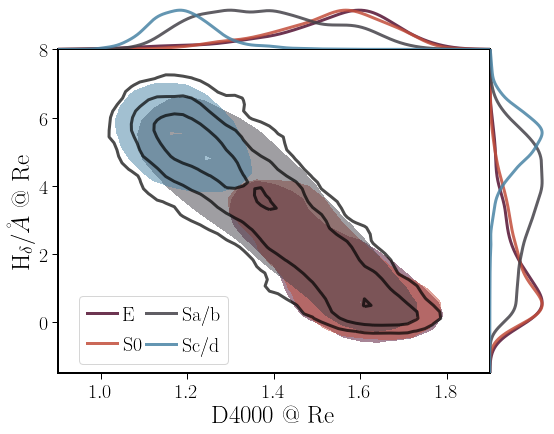

In [51]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Hd_Re_fit'] > 0) & (tab['D4000_Re_fit1']>0)
x=tab['D4000_Re_fit1'][mask_now]
y=tab['Hd_Re_fit'][mask_now]
z=morph_few[mask_now]
y_min=-1.5
y_max=8
x_min=0.9
x_max=1.9 #r'H$_\delta$/$\AA$ Re'
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=y_min,y_max=y_max,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'D4000 @ Re',y_label=r'H$_\delta$/$\AA$ @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.05)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,y_min,y_max,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("D4000_Hd.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


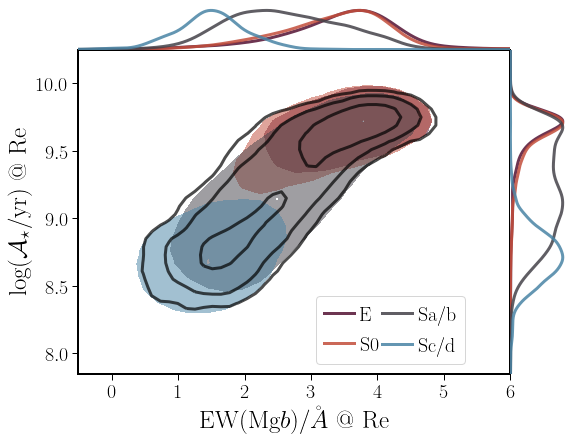

In [52]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Mgb_Re_fit'] > -10) & (tab['Age_LW_Re_fit']>0)
x=tab['Mgb_Re_fit'][mask_now]
y=tab['Age_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-0.5
x_max=6.0
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=7.85,y_max=10.25,z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'EW(Mg$b$)/$\AA$ @ Re',y_label=r'log($\mathcal{A}_\star$/yr) @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,7.5,10.5,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Mgb_Age.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


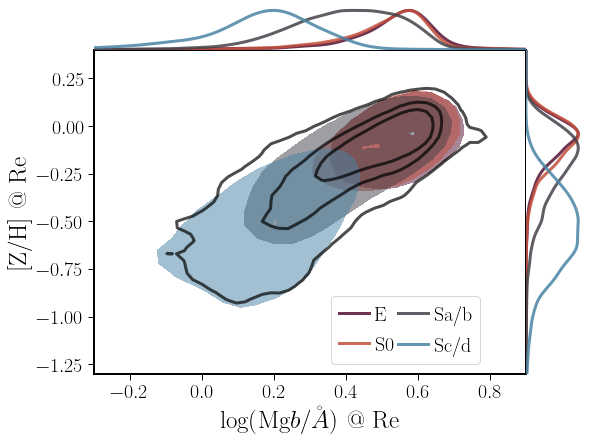

In [53]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Mgb_Re_fit'] > 0) & (tab['ZH_LW_Re_fit']>-10)
x=np.log10(tab['Mgb_Re_fit'][mask_now])
y=tab['ZH_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-0.3
x_max=0.9
y_min=-1.3
y_max=0.4
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=y_min,y_max=y_max,\
                       z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'log$\big ($Mg$b$/$\AA$$\big )$ @ Re',y_label=r'[Z/H] @ Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,y_min,y_max,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Mgb_ZH.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [43]:
tab['MgFe'] = np.sqrt(tab['Mgb_Re_fit']*(0.72*tab['Fe5270_Re_fit']+0.28*tab['Fe5335_Re_fit']))

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


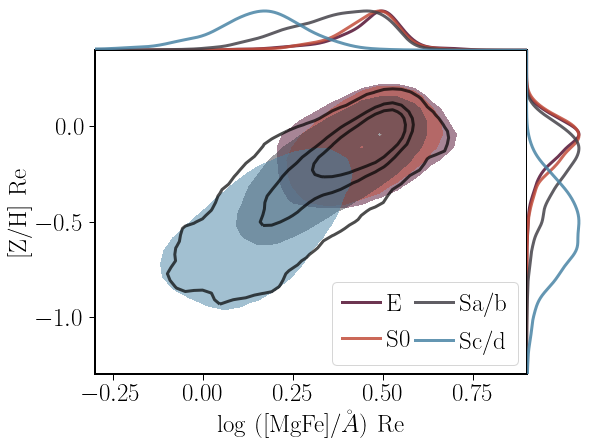

In [44]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['MgFe'] > 0) & (tab['ZH_LW_Re_fit']>-10)
x=np.log10(tab['MgFe'][mask_now])
y=tab['ZH_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-0.3
x_max=0.9
y_min=-1.3
y_max=0.4
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=y_min,y_max=y_max,\
                       z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'log ([MgFe]/$\AA$) Re',y_label=r'[Z/H] Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,y_min,y_max,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("MgFe_ZH.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

0 0 3 4
1 0 3 4
2 0 3 4
3 0 3 4


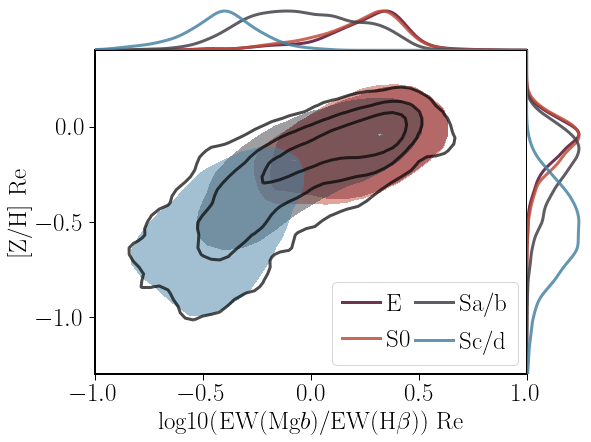

In [45]:
mask_now = mask_now_in & (morph_few!=-10) & ( tab['Mgb_Re_fit'] > 0) & (tab['ZH_LW_Re_fit']>-10) & ( tab['Hb_Re_fit'] > 0) 
x=np.log10(tab['Mgb_Re_fit'][mask_now]/tab['Hb_Re_fit'][mask_now])
y=tab['ZH_LW_Re_fit'][mask_now]
z=morph_few[mask_now]
x_min=-1
x_max=1
y_min=-1.3
y_max=0.4
fig,ax=plot_2Dhist_map(x_par=x,y_par=y,\
            z_par=z,\
            x_min=x_min,x_max=x_max,y_min=y_min,y_max=y_max,\
                       z_min=0,z_max=3,c_main='black',label='MPL-11',\
            x_label=r'log10$\big ($EW(Mg$b$)/EW(H$\beta$)$\big )$ Re',y_label=r'[Z/H] Re',figname='lambda_e',alpha=0.85,\
            size_scatter=5.0,n_zbins=4,z_lim=80,labels_zbins=morph_list_few,color_cm_now=None,\
            reverse=1,x_loc=0.55)#'Spectral_r')
my_contour(ax,x,y,x_min,x_max,y_min,y_max,c_color='black',\
               nbins=50,title='',linewidths=3,alpha=0.7)
#


#mask_irr = mask_now_in & (tab['best_type_n']>9)
#ax.scatter((1-ab)[mask_irr],tab['Lambda_Re'][mask_irr],marker='*',color='black')

fig.tight_layout()
fig.savefig("Mgb_Hb_ZH.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [46]:
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20})

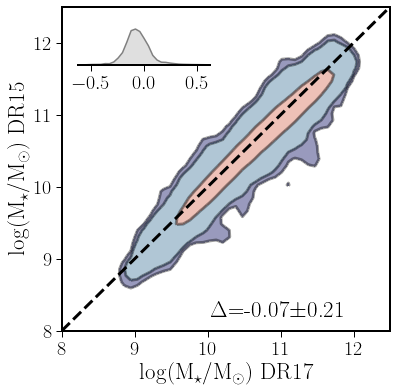

In [47]:
#def comp_plot(fig)

def comp_plot(x_par=tab_DR17_DR15['log_Mass'],y_par=tab_DR17_DR15['DR15_log_Mass'],\
                x_min=7,x_max=13,y_min=7,y_max=13,c_main='grey',label='MPL-11',\
                x_label='log Mass',y_label='log Mass',figname='Mst_comp',alpha=0.75,\
                   size_scatter=5.0,n_zbins=11,labels_zbins=None,color_cm_now='coolwarm_r',z_lim=80,\
               x_loc=0.02,y_loc=0.03,z_label='',reverse=0, xscale='linear', yscale='linear', 
               scatter=1,cmap=color_cm_now,conts=[0.99,0.95,0.65,0.0], equal=None, one=None, offset=None):
    if (equal is None):
        y_min=x_min
        y_max=x_max
    #alpha=1
#    print(y_par)

    fig = plt.figure(figsize=(6,6))
    left, width = 0.21, 0.76
#    bottom, height = 0.19, 0.75
    bottom, height = 0.20, 0.75
    spacing = 0.00
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left+0.05*(width), bottom + 0.82*height, 0.4*width, 1-(bottom+0.95*height)]
    ax = fig.add_axes(rect_scatter)
    if one is None:
        ax_histx = fig.add_axes(rect_histx)
    if (color_cm_now is None):
        color_cm_now = vel_map()
        if (reverse==1):
            color_cm_now=color_cm_now.reversed()
    colormap=cm.get_cmap(color_cm_now)


#    colormap = plt.cm(color_cm_now)

    if one is None:
        ax.plot([x_min,x_max],[y_min,y_max],linewidth=3,color='black',ls='--')
    if (scatter==1):
        ax.scatter(x_par, y_par, s=size_scatter*3, \
                   alpha=alpha,color='black',edgecolor='none',\
                   rasterized=True,label=label)
    my_contourf(ax,x_par,y_par,x_min,x_max,y_min,y_max,c_color=c_main,\
               nbins=50,title=label,linewidths=3,alpha=alpha,conts=conts,cmap=cmap)
    par=y_par-x_par
    mask_par = (x_par>x_min) & (x_par<x_max) & (y_par>y_min) & (y_par<y_max)
    par=par[mask_par]
    mean=np.nanmean(par)
    std=np.nanstd(par)
    if one is None:
        sns.kdeplot(par,ax=ax_histx, shade=True, legend=False,\
                    color="grey")#,gridsize=int(len(rat[mask])/2)
        if offset is None:
            ax_histx.set_xlim(-3*std,3*std)
        else:
            ax_histx.set_xlim(mean-3*std,mean+3*std)
    if one is None:
        ax_histx.spines['right'].set_visible(False)
        ax_histx.spines['top'].set_visible(False)
        ax_histx.spines['left'].set_visible(False)
        ax_histx.get_yaxis().set_visible(False)
    if one is None:
        ax_histx.patch.set_alpha(0)

    a_mean="{:0.2f}".format(mean)#np.round(mean,decimals=2)
    a_std="{:0.2f}".format(std)#np.round(std,decimals=2)
    if one is None:
        ax.text(x_min+0.45*(x_max-x_min),y_min+0.05*(y_max-y_min),rf'$\Delta$={a_mean}$\pm${a_std}', fontsize=23)
    ax.set_xlabel(x_label, fontsize=23)
    ax.set_ylabel(y_label, fontsize=23)
    if (equal is None):
        ax.set_xticks(ax.get_yticks())
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])

    return fig,ax,mean,std
    
#
# Mass Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_Mass'],y_par=tab_DR17_DR15['DR15_log_Mass'],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17', y_label=r'log(M$_\star$/M$_\odot$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=8,x_max=12.5)

fig.tight_layout()
fig.savefig("comp_Mass_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

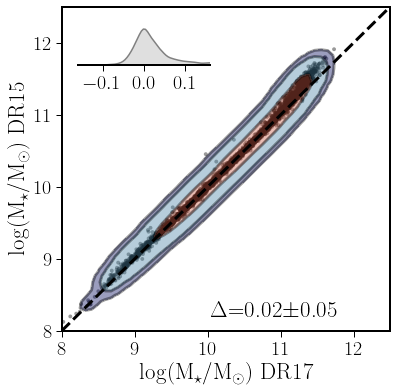

In [48]:
#
# Mass Comparison
#
#mask_mass_phot = np.logical_not((np.abs(tab_DR17_DR15['log_Mass_phot']-tab_DR17_DR15['DR15_log10'])>0)
mask_mass_phot = ~(np.abs(tab_DR17_DR15['log_Mass_phot']-tab_DR17_DR15['DR15_log10'])>0.5)
#print(tab_DR17_DR15['DR15_log10'][mask_mass_phot])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_Mass_phot'][mask_mass_phot],\
                          y_par=tab_DR17_DR15['DR15_log10'][mask_mass_phot],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17', y_label=r'log(M$_\star$/M$_\odot$) DR15',
          c_main='black',scatter=1,alpha=0.4,x_min=8,x_max=12.5)

fig.tight_layout()
fig.savefig("comp_Mass_phot_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

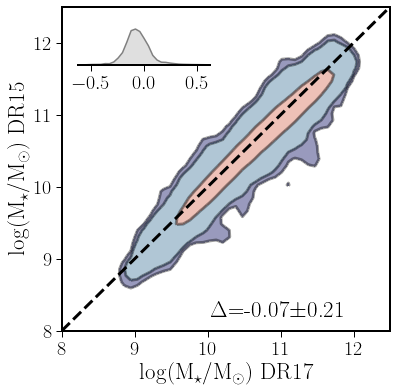

In [259]:
#
# Mass Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_Mass'],y_par=tab_DR17_DR15['DR15_log_Mass'],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17', y_label=r'log(M$_\star$/M$_\odot$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=8,x_max=12.5)

fig.tight_layout()
fig.savefig("comp_Mass_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [260]:
#fig,axes=plt.subplots(3,3,figsize=(9,9))
#axes[0,0]=ax
#plt.close(fig)
ax1=ax

#fig2 = plt.figure()
#fig2.axes.append(ax)
#plt.show()

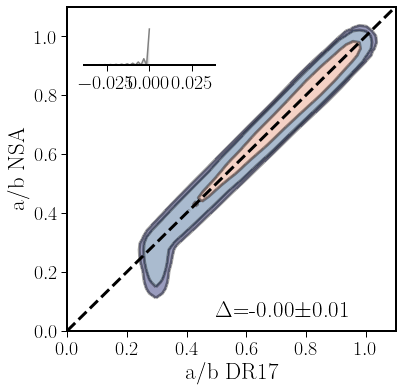

In [261]:
mask_now = (tab_all['Lambda_Re'] > -0.01) & (tab['nsa_inclination']>0)
ab0=np.sqrt((1-tab['ellip'][mask_now]**2-0.13**2)/(1-0.13**2))
ab1=np.cos(tab['nsa_inclination'][mask_now]/180*np.pi)
fig,ax,mean,std=comp_plot(x_par=ab0,y_par=ab1,\
          x_label=r'a/b DR17', y_label=r'a/b NSA',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=1.1)

fig.tight_layout()
fig.savefig("comp_ab_NSA.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [262]:
ax2=ax

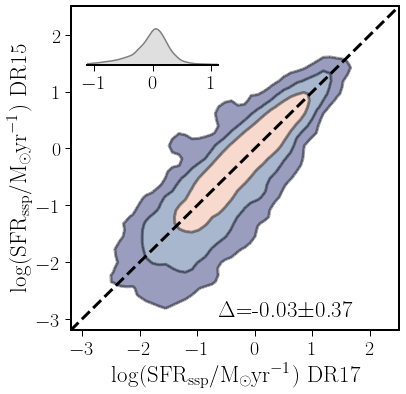

In [263]:
#
# SFR_ssp Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_SFR_ssp'],y_par=tab_DR17_DR15['DR15_log_SFR_ssp'],\
          x_label=r'log(SFR$_{\rm ssp}$/M$_\odot$yr$^{-1}$) DR17',\
                       y_label=r'log(SFR$_{\rm ssp}$/M$_\odot$yr$^{-1}$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-3.2,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_ssp_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
ax3=ax

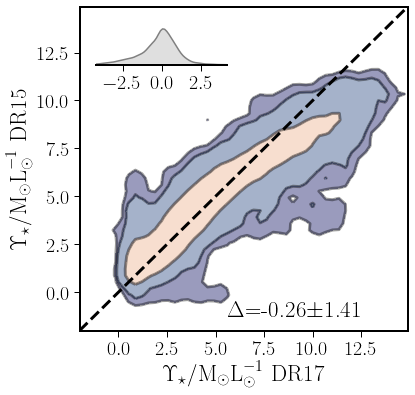

In [264]:
#
# M/L Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['ML_avg'],y_par=tab_DR17_DR15['DR15_ML_avg'],\
          x_label=r'$\Upsilon_\star$/M$_\odot$L$_\odot^{-1}$ DR17',\
                       y_label=r'$\Upsilon_\star$/M$_\odot$L$_\odot^{-1}$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-2,x_max=14.9)

fig.tight_layout()
fig.savefig("comp_ML_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
ax4=ax

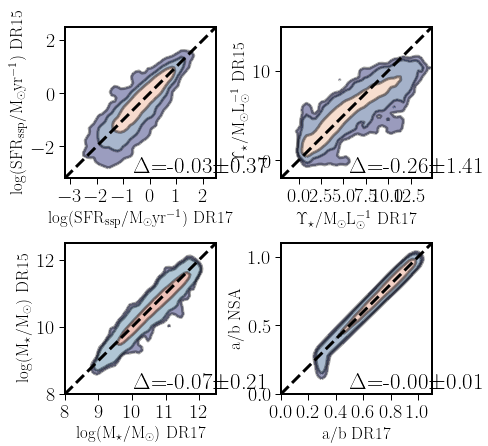

In [265]:
def move_axes(ax, fig, subplot_spec=111):
      """Move an Axes object from a figure to a new pyplot managed Figure in
      the specified subplot."""

      # get a reference to the old figure context so we can release it
      old_fig = ax.figure

      # remove the Axes from it's original Figure context
      ax.remove()

      # set the pointer from the Axes to the new figure
      ax.figure = fig

      # add the Axes to the registry of axes for the figure
      fig.axes.append(ax)
      # twice, I don't know why...
      fig.add_axes(ax)

      # then to actually show the Axes in the new figure we have to make
      # a subplot with the positions etc for the Axes to go, so make a
      # subplot which will have a dummy Axes
      #dummy_ax = fig.add_subplot(subplot_spec)

      # then copy the relevant data from the dummy to the ax
      #ax.set_position(dummy_ax.get_position())

      # then remove the dummy
      #dummy_ax.remove()

      
      # close the figure the original axis was bound to
      plt.close(old_fig)
 


#rc.update({'font.size': 17,\
#           'font.weight': 900,\
#           'text.usetex': True,\
#           'path.simplify'           :   True,\
#           'xtick.labelsize' : 17,\
#           'ytick.labelsize' : 17})

#fig_new,axes=plt.subplots(figsize=(9,9))
fig_new = plt.figure(figsize=(12,12))
#rc.update({'font.size': 12,\
#           'font.weight': 900})

#fig_new.axes.append(ax1)
#ax3=ax1.copy()
#ax4=ax2.copy()
move_axes(ax1,fig_new)#,subplot_spec=221)  
move_axes(ax2,fig_new)#,subplot_spec=222)       
move_axes(ax3,fig_new)#,subplot_spec=211)       
move_axes(ax4,fig_new)#,subplot_spec=212)       
ax1.set_position([0.15,0.12,0.35,0.35])
ax2.set_position([0.65,0.12,0.35,0.35])
ax3.set_position([0.15,0.62,0.35,0.35])
ax4.set_position([0.65,0.62,0.35,0.35])

#plt.rcParams['xlabel.labelsize']=8
myf=17
ax1.set_xlabel(ax1.get_xlabel(),fontsize=myf)
ax1.set_ylabel(ax1.get_ylabel(),fontsize=myf)
ax2.set_xlabel(ax2.get_xlabel(),fontsize=myf)
ax2.set_ylabel(ax2.get_ylabel(),fontsize=myf)
ax3.set_xlabel(ax3.get_xlabel(),fontsize=myf)
ax3.set_ylabel(ax3.get_ylabel(),fontsize=myf)
ax4.set_xlabel(ax4.get_xlabel(),fontsize=myf)
ax4.set_ylabel(ax4.get_ylabel(),fontsize=myf)


#ax1.
#import matplotlib
#ax.set_xlabel(x_label, fontsize=23)
#move_axes(ax1,fig_new,subplot_spec=221)       
#move_axes(ax2,fig_new,subplot_spec=222)       
#move_axes(ax2,fig_new)
#move_axes(ax2,fig_new)
#axes[0,0]=ax1
#axes[0,1]=ax2

rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20})

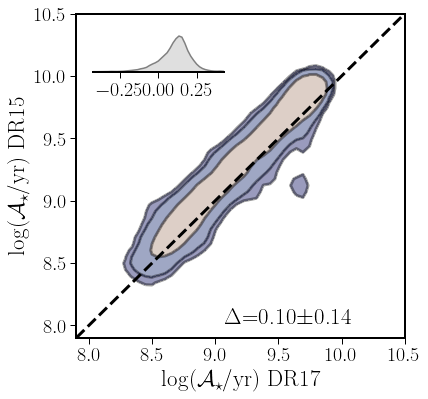

In [266]:
#
# Age Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Age_LW_Re_fit'],y_par=tab_DR17_DR15['DR15_Age_LW_Re_fit'],\
          x_label=r'log($\mathcal{A}_\star$/yr) DR17',\
                       y_label=r'log($\mathcal{A}_\star$/yr) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=7.9,x_max=10.5)

fig.tight_layout()
fig.savefig("comp_Age_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

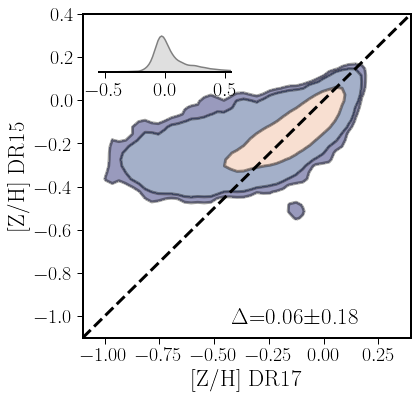

In [267]:
#
# ZH Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['ZH_LW_Re_fit'],y_par=tab_DR17_DR15['DR15_ZH_LW_Re'],\
#fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['ZH_LW_Re_fit'],y_par=tab_DR17_DR15['DR15_ZH_Re_T99'],\
          x_label=r'[Z/H] DR17',\
                       y_label=r'[Z/H] DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.1,x_max=0.4)

fig.tight_layout()
fig.savefig("comp_ZH_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

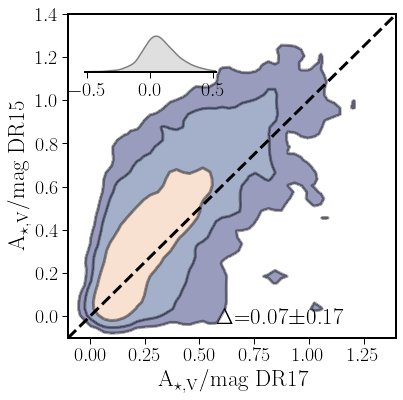

In [268]:
#
# Av Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Av_ssp_Re'],y_par=tab_DR17_DR15['DR15_Av_ssp_stats_mean'],\
          x_label=r'A$_{\rm \star,V}$/mag DR17',\
                       y_label=r'A$_{\rm \star,V}$/mag DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=1.4)

fig.tight_layout()
fig.savefig("comp_Av_ssp_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

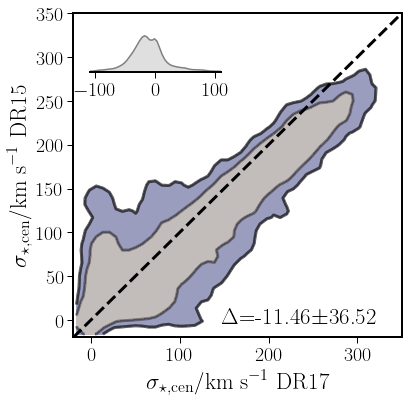

In [269]:
#
# Disp_ssp Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['vel_disp_ssp_cen'],y_par=tab_DR17_DR15['DR15_vel_disp_ssp_cen'],\
          x_label=r'$\sigma_{\star,\rm cen}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\sigma_{\star,\rm cen}$/km s$^{-1}$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350)#conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_ssp_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

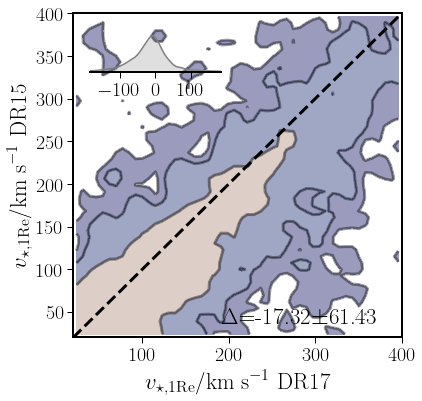

In [270]:
#
# vel_ssp Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['vel_ssp_1'],y_par=tab_DR17_DR15['DR15_vel_ssp_1'],\
          x_label=r'$v_{\star,\rm 1Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$v_{\star,\rm 1Re}$/km s$^{-1}$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=20,x_max=400)#,conts=[0.9,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_vel_ssp_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

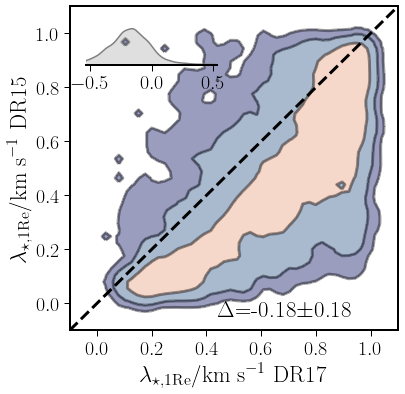

In [271]:
#
# lambda_ssp Comparison
#
incl=tab_DR17_DR15['nsa_inclination']/180*np.pi

C=np.sin(incl)/np.sqrt(1-0.3*(np.cos(incl))**2)
C_corr=C**2-tab_DR17_DR15['DR15_lambda_Re']**2*(C**2-1)


fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Lambda_Re'],y_par=tab_DR17_DR15['DR15_lambda_Re'],\
          x_label=r'$\lambda_{\star,\rm 1Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\lambda_{\star,\rm 1Re}$/km s$^{-1}$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=1.1,conts=[1.0,0.8,0.5,0])

fig.tight_layout()
fig.savefig("comp_lambda_ssp_DR_no_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

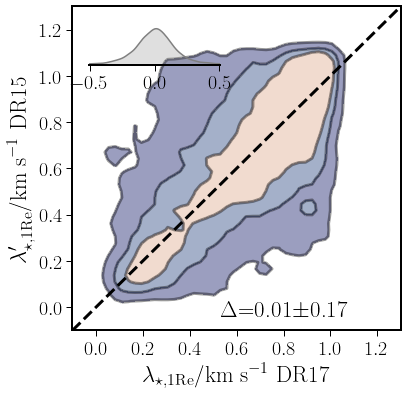

In [272]:
#
# lambda_ssp Comparison
#
incl=tab_DR17_DR15['nsa_inclination']/180*np.pi
incl_min=30/180*np.pi
incl_max=85/180*np.pi
incl[incl<incl_min]=incl_min
incl[incl>incl_max]=incl_min

C=np.sin(incl)/np.sqrt(1-0.3*(np.cos(incl))**2)
C_corr=C**2-tab_DR17_DR15['DR15_lambda_Re']**2*(C**2-1)


fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Lambda_Re'],y_par=tab_DR17_DR15['DR15_lambda_Re']/C_corr,\
          x_label=r'$\lambda_{\star,\rm 1Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\lambda^\prime_{\star,\rm 1Re}$/km s$^{-1}$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=1.3,conts=[1.0,0.8,0.5,0])

fig.tight_layout()
fig.savefig("comp_lambda_ssp_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

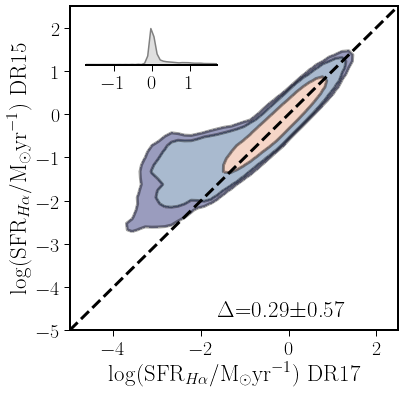

In [273]:
#
# SFR_Ha Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_SFR_Ha'],y_par=tab_DR17_DR15['DR15_lSFR'],\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$) DR17', y_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-5,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_Ha_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

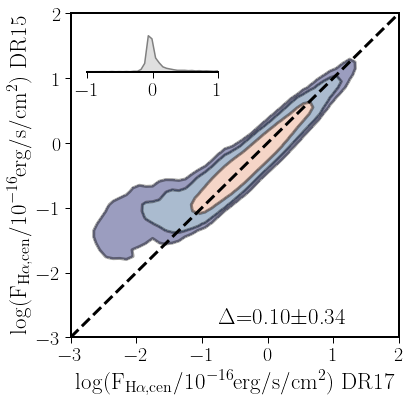

In [274]:
#
# F_Ha Comparison
#
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)
fig,ax,mean,std=comp_plot(x_par=np.log10(np.abs(tab_DR17_DR15['F_Ha_cen'][mask_now])),\
                       y_par=np.log10(np.abs(tab_DR17_DR15['DR15_F_Ha_cen'][mask_now])),\
          x_label=r'log(F$_{\rm H\alpha,\rm cen}$/10$^{-16}$erg/s/cm$^2$) DR17',\
                       y_label=r'log(F$_{\rm H\alpha,\rm cen}$/10$^{-16}$erg/s/cm$^2$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-3,x_max=2)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_F_Ha_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

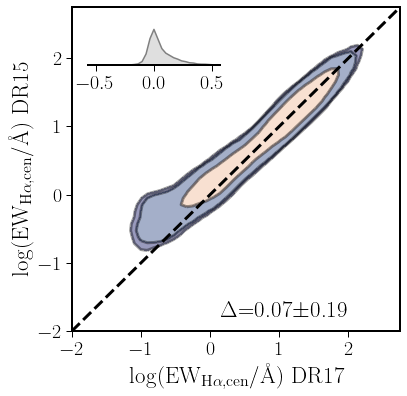

In [275]:
#
# EW_Ha Comparison
#
#mask_now = (tab_DR17_DR15['EW_Ha_cen']>0) & (tab_DR17_DR15['DR15_EW_Ha_cen_mean']>0)
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=np.log10(np.abs(tab_DR17_DR15['EW_Ha_cen'][mask_now])),\
                       y_par=np.log10(np.abs(tab_DR17_DR15['DR15_EW_Ha_cen_mean'][mask_now])),\
          x_label=r'log(EW$_{\rm H\alpha,\rm cen}$/\AA) DR17',\
                       y_label=r'log(EW$_{\rm H\alpha,\rm cen}$/\AA) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-2.0,x_max=2.75)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_EW_Ha_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

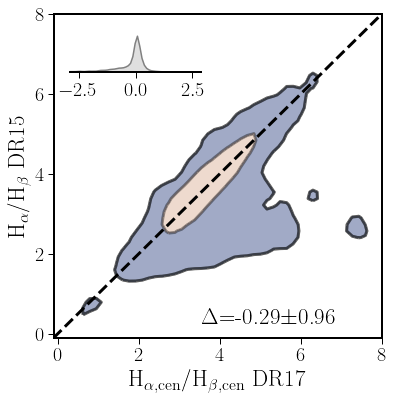

In [276]:
#
# Ha_Hb Comparison
#
#mask_now = (tab_DR17_DR15['EW_Ha_cen']>0) & (tab_DR17_DR15['DR15_EW_Ha_cen_mean']>0)
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Ha_Hb_cen'][mask_now],\
                       y_par=tab_DR17_DR15['DR15_Ha_Hb_cen'][mask_now],\
          x_label=r'H$_{\alpha,\rm cen}$/H$_{\beta,\rm cen}$ DR17',\
                       y_label=r'H$_\alpha$/H$_\beta$ DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=8)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_Ha_Hb_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

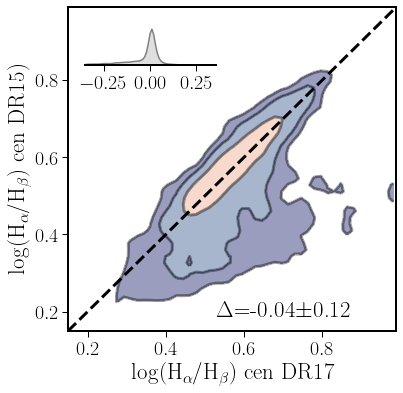

In [277]:
#
# Ha_Hb Comparison
#
#mask_now = (tab_DR17_DR15['EW_Ha_cen']>0) & (tab_DR17_DR15['DR15_EW_Ha_cen_mean']>0)
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=np.log10(tab_DR17_DR15['Ha_Hb_cen'][mask_now]),\
                       y_par=np.log10(tab_DR17_DR15['DR15_Ha_Hb_cen'][mask_now]),\
          x_label=r'log(H$_{\alpha}$/H$_{\beta}$) cen DR17',\
                       y_label=r'log(H$_\alpha$/H$_\beta$) cen DR15)',
          c_main='black',scatter=0,alpha=0.4,x_min=0.15,x_max=0.99)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_log_Ha_Hb_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

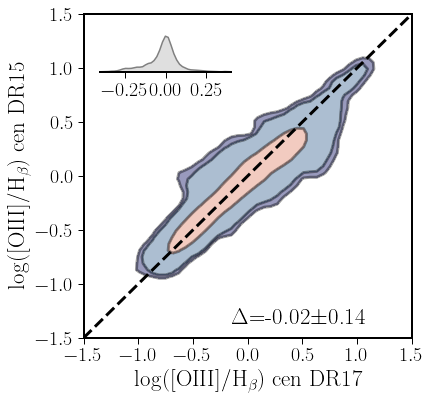

In [278]:
#log_OIII_Hb_cen  Comparison
#
#mask_now = (tab_DR17_DR15['EW_Ha_cen']>0) & (tab_DR17_DR15['DR15_EW_Ha_cen_mean']>0)
#mask_now = (tab_DR17_DR15['log_OIII_cen']>0) & (tab_DR17_DR15['DR15_log_OIII_cen_mean']>0)
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_OIII_Hb_cen'][mask_now],\
                       y_par=tab_DR17_DR15['DR15_log_OIII_Hb_cen_mean'][mask_now],\
          x_label=r'log([OIII]/H$_{\beta}$) cen DR17',\
                       y_label=r'log([OIII]/H$_{\beta}$) cen DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.5,x_max=1.5)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_OIII_Hb_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


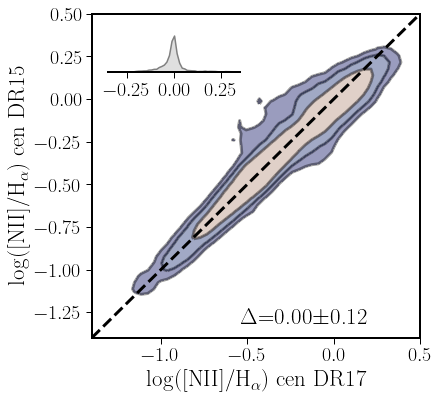

In [279]:
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_NII_Ha_cen'][mask_now],\
                       y_par=tab_DR17_DR15['DR15_log_NII_Ha_cen_mean'][mask_now],\
          x_label=r'log([NII]/H$_{\alpha}$) cen DR17',\
                       y_label=r'log([NII]/H$_{\alpha}$) cen DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.4,x_max=0.5,conts=[0.99,0.8,0.6,0])

fig.tight_layout()
fig.savefig("comp_NII_Ha_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


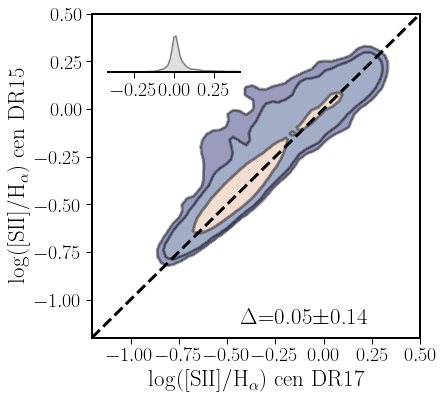

In [280]:
mask_now = (tab_DR17_DR15['F_Ha_cen']>0) & (tab_DR17_DR15['DR15_F_Ha_cen']>0)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_SII_Ha_cen'][mask_now],\
                       y_par=tab_DR17_DR15['DR15_log_SII_Ha_cen_mean'][mask_now],\
          x_label=r'log([SII]/H$_{\alpha}$) cen DR17',\
                       y_label=r'log([SII]/H$_{\alpha}$) cen DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.2,x_max=0.5)#,conts=[0.99,0.8,0.6,0])

fig.tight_layout()
fig.savefig("comp_SII_Ha_cen_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

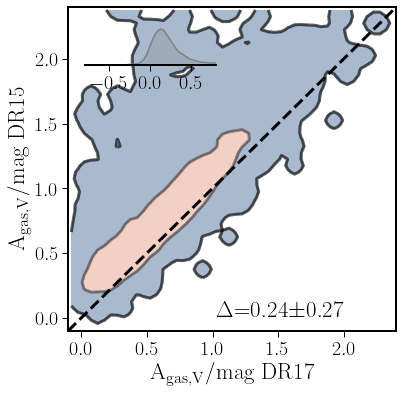

In [281]:
#
# Av gas Comparison
# 
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['Av_gas_Re'],y_par=tab_DR17_DR15['DR15_Av_gas_LW_Re'],\
          x_label=r'A$_{\rm gas, V}$/mag DR17',\
                       y_label=r'A$_{\rm gas, V}$/mag DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=2.4)

fig.tight_layout()
fig.savefig("comp_Av_gas_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

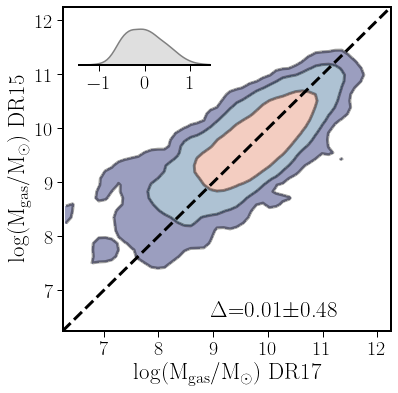

In [282]:
#
# Mass gas Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab_DR17_DR15['log_Mass_gas'],y_par=tab_DR17_DR15['DR15_log_Mass_gas'],\
          x_label=r'log(M$_{\rm gas}$/M$_\odot$) DR17', y_label=r'log(M$_{\rm gas}$/M$_\odot$) DR15',
          c_main='black',scatter=0,alpha=0.4,x_min=6.25,x_max=12.25)

fig.tight_layout()
fig.savefig("comp_Mass_gas_DR.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

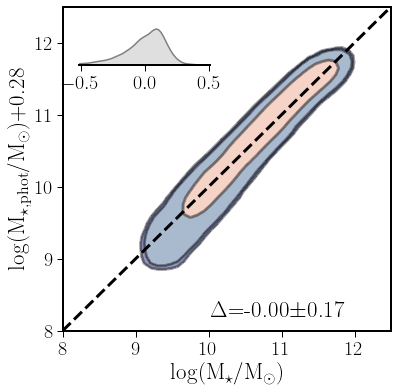

In [283]:
#
# Mass phot Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab['log_Mass'],y_par=tab['log_Mass_phot']+0.28,\
          x_label=r'log(M$_{\rm \star}$/M$_\odot$)', y_label=r'log(M$_{\rm \star,phot}$/M$_\odot$)+0.28',
          c_main='black',scatter=0,alpha=0.4,x_min=8,x_max=12.5)

fig.tight_layout()
fig.savefig("comp_Mass_Mass_phot.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

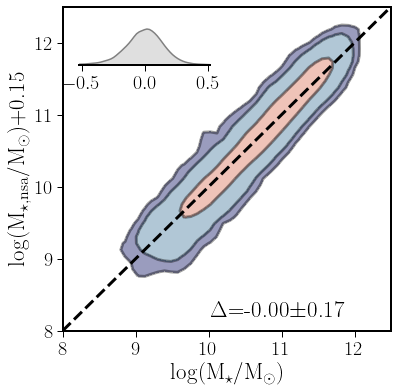

In [284]:
#
# Mass NSA Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab['log_Mass'],y_par=tab['nsa_mstar']+0.15,\
          x_label=r'log(M$_{\rm \star}$/M$_\odot$)', y_label=r'log(M$_{\rm \star,nsa}$/M$_\odot$)+0.15',
          c_main='black',scatter=0,alpha=0.4,x_min=8,x_max=12.5)

fig.tight_layout()
fig.savefig("comp_Mass_Mass_NSA.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

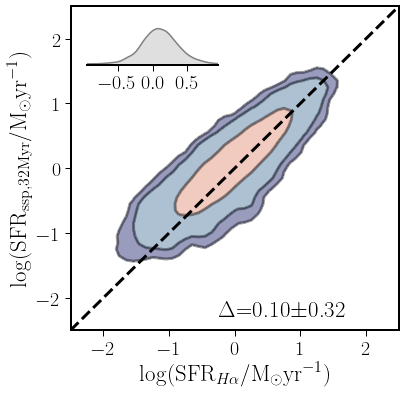

In [285]:
#
# SFR_Ha_ssp Comparison
#

mask_SFGs = tab['EW_Ha_Re'] < -3
fig,ax,mean,std=comp_plot(x_par=tab['log_SFR_Ha'][mask_SFGs],y_par=tab['log_SFR_ssp'][mask_SFGs],\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$)',\
                       y_label=r'log(SFR$_{\rm ssp,32Myr}$/M$_\odot$yr$^{-1}$)',\
          c_main='black',scatter=0,alpha=0.4,x_min=-2.5,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_Ha_ssp.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

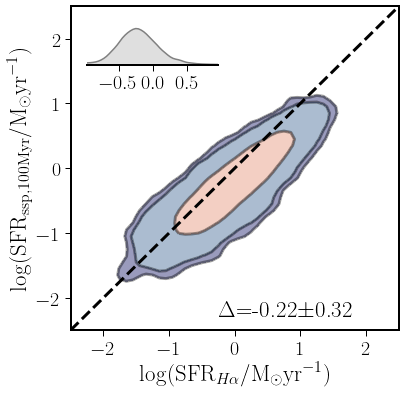

In [286]:
#
# SFR_Ha_ssp Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab['log_SFR_Ha'][mask_SFGs],y_par=tab['log_SFR_ssp_100Myr'][mask_SFGs],\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$)',\
                       y_label=r'log(SFR$_{\rm ssp,100 Myr}$/M$_\odot$yr$^{-1}$)',\
          c_main='black',scatter=0,alpha=0.4,x_min=-2.5,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_Ha_ssp_100Myr.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

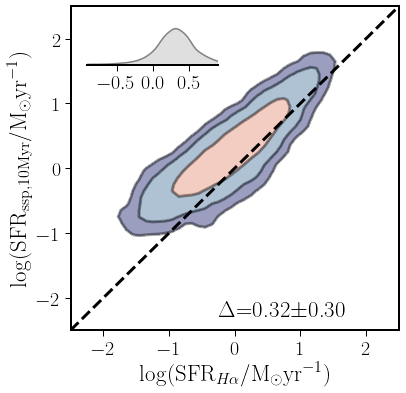

In [287]:
#
# SFR_Ha_ssp Comparison
#
fig,ax,mean,std=comp_plot(x_par=tab['log_SFR_Ha'][mask_SFGs],y_par=tab['log_SFR_ssp_10Myr'][mask_SFGs],\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$)',\
                       y_label=r'log(SFR$_{\rm ssp,10 Myr}$/M$_\odot$yr$^{-1}$)',\
          c_main='black',scatter=0,alpha=0.4,x_min=-2.5,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_Ha_ssp_10Myr.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

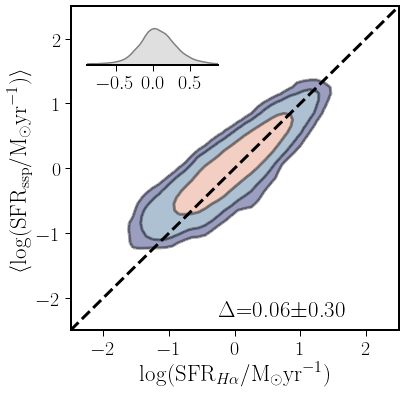

In [288]:
#
# SFR_Ha_ssp Comparison
#
SFR_ssp_mean=(tab['log_SFR_ssp'][mask_SFGs]+\
              tab['log_SFR_ssp_10Myr'][mask_SFGs]+tab['log_SFR_ssp_100Myr'][mask_SFGs])/3
fig,ax,mean,std=comp_plot(x_par=tab['log_SFR_Ha'][mask_SFGs],y_par=SFR_ssp_mean,\
          x_label=r'log(SFR$_{H\alpha}$/M$_\odot$yr$^{-1}$)',\
                       y_label=r'$\big <$log(SFR$_{\rm ssp}$/M$_\odot$yr$^{-1}$)$\big >$',\
          c_main='black',scatter=0,alpha=0.4,x_min=-2.5,x_max=2.5)

fig.tight_layout()
fig.savefig("comp_SFR_Ha_ssp_mean.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

# Comparing the morpholy
# tables/manga-morphology-dl-DR17.fits
# https://www.sdss.org/dr17/data_access/value-added-catalogs/?vac_id=manga-morphology-deep-learning-dr17-catalog

In [289]:
hdu_morph=fits.open("tables/manga-morphology-dl-DR17.fits")#tables/dapall-v3_1_1-3.1.0.fits")#SDSS17Pipe3D_v3_1_1.fits")
hdr_morph=hdu_morph[0].header
tab_morph=Table(hdu_morph[1].data) # HYB
tab_morph.rename_column('PLATEIFU','plateifu')

In [290]:
list_columns(tab_morph.columns)

INTID           Z               P_LTG           P_bar           
MANGA_ID        DUPL_GR         P_LTG_std       P_bar_std       
plateifu        DUPL_N          P_S0            Visual_Class    
OBJID           DUPL_ID         P_S0_std        Visual_Flag     
RA              T-Type          P_edge                          
DEC             T-Type_std      P_edge_std                      


In [291]:
for ind,morph in enumerate(tab_morph['plateifu']):
    tab_morph['plateifu'][ind]=tab_morph['plateifu'][ind].replace(" ","")

tab_DR17_morph=join(tab,tab_morph,keys=['plateifu'])

    #tab_DR17_DR15=join(tab,tab_DR15,keys=['name'])
#print(tab_morph['plateifu'].replace(" ",""))
print('|'+tab_morph['plateifu'][0]+'|')
print('|'+tab['plateifu'][0]+'|')
print(tab_DR17_morph['plateifu'])

|8325-12701|
|10001-12701|
  plateifu 
-----------
10001-12701
10001-12702
10001-12703
10001-12704
10001-12705
 10001-1901
 10001-1902
 10001-3701
 10001-3702
 10001-3703
        ...
  9894-1902
  9894-3701
  9894-3702
  9894-3703
  9894-3704
  9894-6101
  9894-6102
  9894-6103
  9894-6104
  9894-9101
  9894-9102
Length = 9815 rows


In [292]:
print(tab_DR17_morph['T-Type'])

       T-Type       
--------------------
   6.564641952514648
   4.730921268463135
   4.756507873535156
   4.773223400115967
    4.76101016998291
  1.6820045709609985
0.021545112133026123
 -1.1476022005081177
 0.09041932225227356
   2.792056083679199
                 ...
  2.6500043869018555
 0.34328705072402954
   3.838649272918701
  -1.511540174484253
 -2.3530690670013428
  2.6373136043548584
   6.283726215362549
   4.672900199890137
  3.4287099838256836
 -0.9255131483078003
   6.997000694274902
Length = 9815 rows


In [293]:
DS_morph=np.array(np.round(tab_DR17_morph['T-Type'],0),dtype=int)
DS_morph_final=DS_morph.copy()
#print(DS_morph)
#DS_morph=

for i,(T_type,P_S0,P_LTG,VC) in enumerate(zip(tab_DR17_morph['T-Type'],\
                                            tab_DR17_morph['P_S0'],\
                                            tab_DR17_morph['P_LTG'],\
                                            tab_DR17_morph['Visual_Class'])):
    DS_morph_final[i]=-4
    if ((T_type>0) and (P_LTG>=0.5) and (VC==3)):
        DS_morph_final[i]=DS_morph[i]
    if ((T_type<=0) and (P_LTG<0.5) and (VC==2) and (P_S0>0.5)):
        DS_morph_final[i]=0
    if ((T_type<=0) and (P_LTG<0.5) and (VC==1) and (P_S0<=0.5)):
        DS_morph_final[i]=-1       
#    print(i,DS_morph)
#print(DS_morph_final)
#DS_morph_final
tab_DR17_morph.add_column(DS_morph_final,name='T-type_f')
#LTG: T-Type > 0 AND P_LTG ≥ 0.5 AND VC=3
#S0: T-Type ≤ 0 AND P_S0 > 0.5 AND P_LTG < 0.5 AND VC=2
#E: T-Type ≤ 0 AND P_S0 ≤ 0.5 AND P_LTG < 0.5 AND VC=1



#print(tab_DR17_morph['P_S0'])

In [294]:
print(tab_DR17_morph['name'][tab_DR17_morph['best_type_n']==-2],tab_DR17_morph['T-Type'][tab_DR17_morph['best_type_n']==-2])

      name      
----------------
manga-11968-6103
 manga-8144-3703
 manga-8147-3702
 manga-8241-6101
 manga-8274-9102
 manga-8327-9102
 manga-8563-3701
 manga-8563-6102       T-Type      
------------------
1.4396960735321045
 3.557821750640869
3.7487685680389404
6.9381818771362305
2.5570889711380005
 4.951350688934326
   5.8313889503479
  5.88832950592041


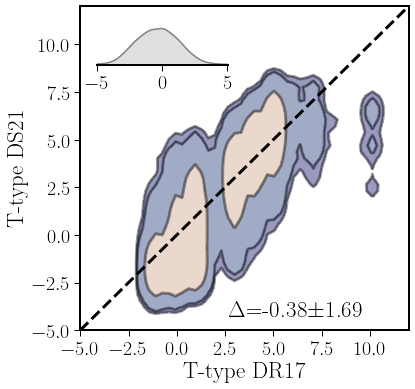

In [295]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_morph['best_type_n'],\
                       y_par=tab_DR17_morph['T-Type'],\
          x_label=r'T-type DR17',\
                       y_label=r'T-type  DS21',
          c_main='black',scatter=0,alpha=0.4,x_min=-5,x_max=12)#,conts=[0.9,0.6,0.3,0])
# Domínguez Sánchez et al. (2021)
fig.tight_layout()
fig.savefig("comp_morph_DL.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

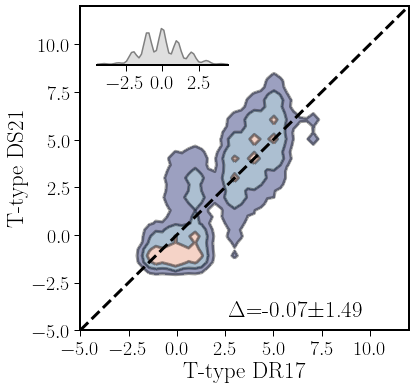

In [296]:
mask_now=(tab_DR17_morph['T-type_f']!=-4)
fig,ax,mean,std=comp_plot(x_par=tab_DR17_morph['best_type_n'][mask_now],\
                       y_par=tab_DR17_morph['T-type_f'][mask_now],\
          x_label=r'T-type DR17',\
                       y_label=r'T-type  DS21',
          c_main='black',scatter=0,alpha=0.4,x_min=-5,x_max=12,conts=[0.9,0.6,0.3,0])
# Domínguez Sánchez et al. (2021)
fig.tight_layout()
fig.savefig("comp_morph_DL.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

(array([   8,  942, 1855, 2236,  122, 1518, 1456, 1388,   82,  115,   13,
         18,   62]), array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5,  9.5, 10.5]))


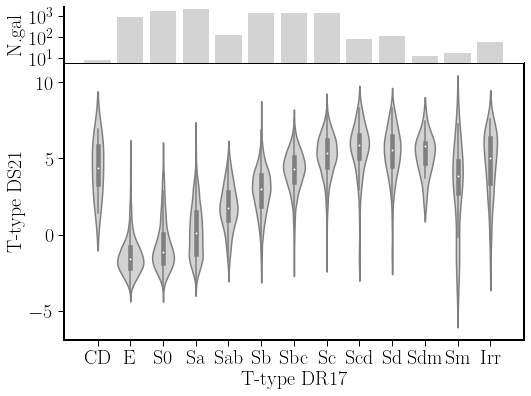

In [297]:
#df_DR17_morph=0
fig = plt.figure(figsize=(8,5.5))
left, width = 0.12, 0.80
bottom, height = 0.15, 0.7
spacing = 0.00
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 1-1.01*(bottom+height)]
rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
#ax_histy = fig.add_axes(rect_histy, sharey=ax)
matplotlib.cm.register_cmap("mycolormap", color_cm_now)

cpal=sns.color_palette("mycolormap",n_colors=32,desat=0.1)

sns.violinplot(ax=ax,x='best_type_n',\
                       y='T-Type',data =tab_DR17_morph.to_pandas(),palette=['lightgrey'],alpha=0.8)
ax.set_xlabel(r'T-type DR17')
ax.set_ylabel(r'T-type DS21')
ax.set_xticklabels(['CD','E','S0','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Sdm','Sm','Irr'])

best_type_n_min=np.min(tab_DR17_morph['best_type_n'])
best_type_n_max=np.max(tab_DR17_morph['best_type_n'])
bins=-2.5+arange(best_type_n_max-best_type_n_min+2)
hist=np.histogram(tab_DR17_morph['best_type_n'],bins=bins)
ax_histx.bar(bins[:-1]+2.5,hist[0],color='lightgrey')
ax_histx.set_yscale('log')

#best_type_n_min=np.min(tab_DR17_morph['T-Type'])
#best_type_n_max=np.max(tab_DR17_morph['T-Type'])
#bins=-2.5+arange(best_type_n_max-best_type_n_min+2)
#hist=np.histogram(tab_DR17_morph['T-Type'],bins=bins)
#ax_histy.barh(bins[:-1]+2.5,hist[0],color='grey')
#ax_histy.set_xscale('log')


#ax_histx.set_ylim([-100,5000])

ax_histx.spines['right'].set_visible(False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['bottom'].set_visible(False)
#ax_histx.spines['left'].set_visible(False)
ax_histx.get_xaxis().set_visible(False)
#ax_histx.get_yaxis().set_visible(False)
ax_histx.set_yticks([10,100,1000])
ax_histx.set_ylabel('N.gal')
#ax_histy.spines['right'].set_visible(False)
#ax_histy.spines['top'].set_visible(False)
#ax_histy.spines['bottom'].set_visible(False)
#ax_histy.spines['left'].set_visible(False)
#ax_histy.get_xaxis().set_visible(False)
#ax_histy.get_yaxis().set_visible(False)

fig.tight_layout()
fig.savefig("comp_morph_v.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
print(hist)

(array([2361,  916,  249,  610,  971, 1173, 1041,  698,  280,   64,    1]), array([-1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,
        9.5]))


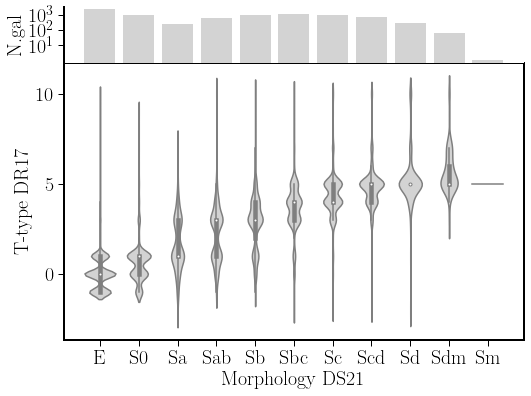

In [298]:
#df_DR17_morph=0
mask_now=(tab_DR17_morph['T-type_f']!=-4)
tab_now = tab_DR17_morph[mask_now]
fig = plt.figure(figsize=(8,5.5))
left, width = 0.12, 0.80
bottom, height = 0.15, 0.7
spacing = 0.00
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 1-1.01*(bottom+height)]
rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
#ax_histy = fig.add_axes(rect_histy, sharey=ax)
matplotlib.cm.register_cmap("mycolormap", color_cm_now)

cpal=sns.color_palette("mycolormap",n_colors=32,desat=0.1)

sns.violinplot(ax=ax,x='T-type_f',\
                       y='best_type_n',data =tab_now.to_pandas(),palette=['lightgrey'],alpha=0.8)
ax.set_ylabel(r'T-type DR17')
ax.set_xlabel(r'Morphology DS21')
ax.set_xticklabels(['E','S0','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Sdm','Sm'])

best_type_n_min=np.min(tab_now['T-type_f'])
best_type_n_max=np.max(tab_now['T-type_f'])
bins=-1.5+arange(best_type_n_max-best_type_n_min+2)
hist=np.histogram(tab_now['T-type_f'],bins=bins)
ax_histx.bar(bins[:-1]+1.5,hist[0],color='lightgrey')
ax_histx.set_yscale('log')

#best_type_n_min=np.min(tab_DR17_morph['T-Type'])
#best_type_n_max=np.max(tab_DR17_morph['T-Type'])
#bins=-2.5+arange(best_type_n_max-best_type_n_min+2)
#hist=np.histogram(tab_DR17_morph['T-Type'],bins=bins)
#ax_histy.barh(bins[:-1]+2.5,hist[0],color='grey')
#ax_histy.set_xscale('log')


#ax_histx.set_ylim([-100,5000])

ax_histx.spines['right'].set_visible(False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['bottom'].set_visible(False)
#ax_histx.spines['left'].set_visible(False)
ax_histx.get_xaxis().set_visible(False)
#ax_histx.get_yaxis().set_visible(False)
ax_histx.set_yticks([10,100,1000])
ax_histx.set_ylabel('N.gal')
#ax_histy.spines['right'].set_visible(False)
#ax_histy.spines['top'].set_visible(False)
#ax_histy.spines['bottom'].set_visible(False)
#ax_histy.spines['left'].set_visible(False)
#ax_histy.get_xaxis().set_visible(False)
#ax_histy.get_yaxis().set_visible(False)

fig.tight_layout()
fig.savefig("comp_morph_v_f.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
print(hist)

(array([2361,  916,  249,  610,  971, 1173, 1041,  698,  280,   64,    1]), array([-1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,
        9.5]))


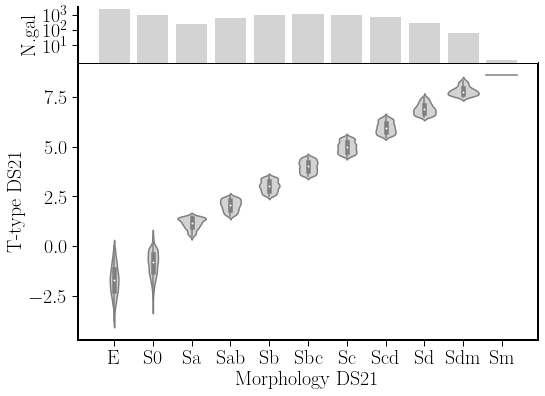

In [299]:
#df_DR17_morph=0
mask_now=(tab_DR17_morph['T-type_f']!=-4)
tab_now = tab_DR17_morph[mask_now]
fig = plt.figure(figsize=(8,5.5))
left, width = 0.12, 0.80
bottom, height = 0.15, 0.7
spacing = 0.00
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 1-1.01*(bottom+height)]
rect_histy = [left + width + spacing, bottom, 1-(left+width), height]
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
#ax_histy = fig.add_axes(rect_histy, sharey=ax)
matplotlib.cm.register_cmap("mycolormap", color_cm_now)

cpal=sns.color_palette("mycolormap",n_colors=32,desat=0.1)

sns.violinplot(ax=ax,x='T-type_f',\
                       y='T-Type',data =tab_now.to_pandas(),palette=['lightgrey'],alpha=0.8)
ax.set_ylabel(r'T-type DS21')
ax.set_xlabel(r'Morphology DS21')
ax.set_xticklabels(['E','S0','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Sdm','Sm'])

best_type_n_min=np.min(tab_now['T-type_f'])
best_type_n_max=np.max(tab_now['T-type_f'])
bins=-1.5+arange(best_type_n_max-best_type_n_min+2)
hist=np.histogram(tab_now['T-type_f'],bins=bins)
ax_histx.bar(bins[:-1]+1.5,hist[0],color='lightgrey')
ax_histx.set_yscale('log')

#best_type_n_min=np.min(tab_DR17_morph['T-Type'])
#best_type_n_max=np.max(tab_DR17_morph['T-Type'])
#bins=-2.5+arange(best_type_n_max-best_type_n_min+2)
#hist=np.histogram(tab_DR17_morph['T-Type'],bins=bins)
#ax_histy.barh(bins[:-1]+2.5,hist[0],color='grey')
#ax_histy.set_xscale('log')


#ax_histx.set_ylim([-100,5000])

ax_histx.spines['right'].set_visible(False)
ax_histx.spines['top'].set_visible(False)
ax_histx.spines['bottom'].set_visible(False)
#ax_histx.spines['left'].set_visible(False)
ax_histx.get_xaxis().set_visible(False)
#ax_histx.get_yaxis().set_visible(False)
ax_histx.set_yticks([10,100,1000])
ax_histx.set_ylabel('N.gal')
#ax_histy.spines['right'].set_visible(False)
#ax_histy.spines['top'].set_visible(False)
#ax_histy.spines['bottom'].set_visible(False)
#ax_histy.spines['left'].set_visible(False)
#ax_histy.get_xaxis().set_visible(False)
#ax_histy.get_yaxis().set_visible(False)

fig.tight_layout()
fig.savefig("comp_morph_v_fm.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")
print(hist)

[Text(0, 0, 'CD'),
 Text(1, 0, 'E'),
 Text(2, 0, 'S0'),
 Text(3, 0, 'Sa'),
 Text(4, 0, 'Sab'),
 Text(5, 0, 'Sb'),
 Text(6, 0, 'Sbc'),
 Text(7, 0, 'Sc'),
 Text(8, 0, 'Scd'),
 Text(9, 0, 'Sd'),
 Text(10, 0, 'Sdm'),
 Text(11, 0, 'Sm'),
 Text(12, 0, 'Irr')]

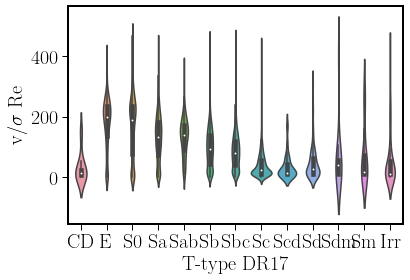

In [300]:
#df_DR17_morph=

ax = sns.violinplot(x='best_type_n',\
                       y='vel_disp_ssp_cen',data =tab_DR17_morph.to_pandas())
ax.set_xlabel(r'T-type DR17')
ax.set_ylabel(r'v/$\sigma$ Re')
ax.set_xticklabels(['CD','E','S0','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Sdm','Sm','Irr'])


[Text(0, 0, 'CD'),
 Text(1, 0, 'E'),
 Text(2, 0, 'S0'),
 Text(3, 0, 'Sa'),
 Text(4, 0, 'Sab'),
 Text(5, 0, 'Sb'),
 Text(6, 0, 'Sbc'),
 Text(7, 0, 'Sc'),
 Text(8, 0, 'Scd'),
 Text(9, 0, 'Sd'),
 Text(10, 0, 'Sdm'),
 Text(11, 0, 'Sm'),
 Text(12, 0, 'Irr')]

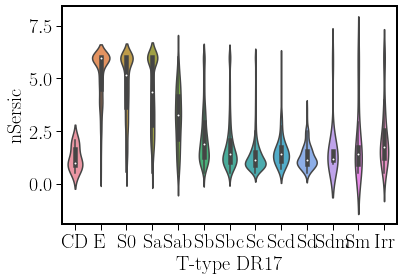

In [301]:
#df_DR17_morph=

ax = sns.violinplot(x='best_type_n',\
                       y='nsa_sersic_n_morph',data =tab_DR17_morph.to_pandas())
ax.set_xlabel(r'T-type DR17')
ax.set_ylabel(r'nSersic')
ax.set_xticklabels(['CD','E','S0','Sa','Sab','Sb','Sbc','Sc','Scd','Sd','Sdm','Sm','Irr'])


# Comparison With the DAP

In [302]:
# tables/dapall-v3_1_1-3.1.0.fits
hdu_dap=fits.open("tables/dapall-v3_1_1-3.1.0.fits")#SDSS17Pipe3D_v3_1_1.fits")
hdr_dap=hdu_dap[0].header
tab_dap=Table(hdu_dap[3].data) # HYB

#
# Flux and area conversion
#
tab_dap['EMLINE_SFLUX_CEN']=tab_dap['EMLINE_SFLUX_CEN']/10.0/25


In [303]:
print(len(tab_dap))

10782


In [304]:
tab_dap.rename_column('PLATEIFU','plateifu')
#names='manga-'+tab_dap['PLATEIFU']
#tab_dap.add_column('manga-'+tab_dap['PLATEIFU'],name='name')

In [305]:
list_columns(tab_dap.columns)

PLATE                  NSA_ELPETRO_PHI        DAPBINS                EMLINE_RCHI2_1RE       
IFUDESIGN              NSA_ELPETRO_TH50_R     RCOV90                 EMLINE_SFLUX_CEN       
plateifu               NSA_SERSIC_BA          SNR_MED                EMLINE_SFLUX_1RE       
MANGAID                NSA_SERSIC_PHI         SNR_RING               EMLINE_SFLUX_TOT       
DRPALLINDX             NSA_SERSIC_TH50        SB_1RE                 EMLINE_SSB_1RE         
MODE                   NSA_SERSIC_N           BIN_RMAX               EMLINE_SSB_PEAK        
DAPTYPE                VERSDRP2               BIN_R_N                EMLINE_SEW_1RE         
DAPDONE                VERSDRP3               BIN_R_SNR              EMLINE_SEW_PEAK        
OBJRA                  VERSCORE               STELLAR_Z              EMLINE_GFLUX_CEN       
OBJDEC                 VERSUTIL               STELLAR_VEL_LO         EMLINE_GFLUX_1RE       
IFURA                  VERSDAP                STELLAR_VEL_HI         E

In [306]:
n_ind_dap = len(tab_dap['SPECINDEX_1RE'][0])
for i in arange(1,n_ind_dap):
    if (i<10):
        key='SPI0'+str(i)
    else:
        key='SPI'+str(i)        
    print (i,key,hdr_dap[key])
print(n_ind_dap)
#print(hdr_dap['ELS01'])
#print(tab_dap['EMLINE_SFLUX_CEN'])

1 SPI01 CN1
2 SPI02 CN2
3 SPI03 Ca4227
4 SPI04 G4300
5 SPI05 Fe4383
6 SPI06 Ca4455
7 SPI07 Fe4531
8 SPI08 C24668
9 SPI09 Hb
10 SPI10 Fe5015
11 SPI11 Mg1
12 SPI12 Mg2
13 SPI13 Mgb
14 SPI14 Fe5270
15 SPI15 Fe5335
16 SPI16 Fe5406
17 SPI17 Fe5709
18 SPI18 Fe5782
19 SPI19 NaD
20 SPI20 TiO1
21 SPI21 TiO2
22 SPI22 HDeltaA
23 SPI23 HGammaA
24 SPI24 HDeltaF
25 SPI25 HGammaF
26 SPI26 CaHK
27 SPI27 CaII1
28 SPI28 CaII2
29 SPI29 CaII3
30 SPI30 Pa17
31 SPI31 Pa14
32 SPI32 Pa12
33 SPI33 MgICvD
34 SPI34 NaICvD
35 SPI35 MgIIR
36 SPI36 FeHCvD
37 SPI37 NaI
38 SPI38 bTiO
39 SPI39 aTiO
40 SPI40 CaH1
41 SPI41 CaH2
42 SPI42 NaISDSS
43 SPI43 TiO2SDSS
44 SPI44 D4000
45 SPI45 Dn4000
46


In [307]:
n_elines_dap = len(tab_dap['EMLINE_SFLUX_CEN'][0])
for i in arange(1,n_elines_dap):
    if (i<10):
        key='ELS0'+str(i)
    else:
        key='ELS'+str(i)        
    print (i,key,hdr_dap[key])
print(n_elines_dap)
print(hdr_dap['ELS01'])
#print(tab_dap['EMLINE_SFLUX_CEN'])

1 ELS01 OIId-3728
2 ELS02 OII-3729
3 ELS03 H12-3751
4 ELS04 H11-3771
5 ELS05 Hthe-3798
6 ELS06 Heta-3836
7 ELS07 NeIII-3869
8 ELS08 HeI-3889
9 ELS09 Hzet-3890
10 ELS10 NeIII-3968
11 ELS11 Heps-3971
12 ELS12 Hdel-4102
13 ELS13 Hgam-4341
14 ELS14 HeII-4687
15 ELS15 Hb-4862
16 ELS16 OIII-4960
17 ELS17 OIII-5008
18 ELS18 NI-5199
19 ELS19 NI-5201
20 ELS20 HeI-5877
21 ELS21 OI-6302
22 ELS22 OI-6365
23 ELS23 NII-6549
24 ELS24 Ha-6564
25 ELS25 NII-6585
26 ELS26 SII-6718
27 ELS27 SII-6732
28 ELS28 HeI-7067
29 ELS29 ArIII-7137
30 ELS30 ArIII-7753
31 ELS31 Peta-9017
32 ELS32 SIII-9071
33 ELS33 Pzet-9231
34 ELS34 SIII-9533
35
OIId-3728


In [308]:
n_OII_dap=0
n_Hb_dap=14
n_OIII_dap=16
n_Ha_dap=23
n_NII_dap=24
n_SII17_dap=25
n_SII31_dap=26

tab_DR17_dap=join(tab,tab_dap,keys=['plateifu'])

In [309]:
ni_Hb_dap=8
ni_Fe5270_dap=13
ni_Fe5335_dap=14
ni_Mg1_dap=10
ni_Mg2_dap=11
ni_Mgb_dap=12
ni_D4000_dap=43
ni_Dn4000_dap=44
ni_HDeltaA_dap=21
ni_HGammaA_dap=22
ni_HDeltaF_dap=23
ni_HGammaF_dap=24



#'Hd_Re_fit','e_Hd_Re_fit','Hd_alpha_fit','e_Hd_alpha_fit','Hb_Re_fit','e_Hb_Re_fit','Hb_alpha_fit','e_Hb_alpha_fit','Mgb_Re_fit','e_Mgb_Re_fit','Mgb_alpha_fit','e_Mgb_alpha_fit','Fe5270_Re_fit','e_Fe5270_Re_fit','Fe5270_alpha_fit','e_Fe5270_alpha_fit','Fe5335_Re_fit','e_Fe5335_Re_fit','Fe5335_alpha_fit','e_Fe5335_alpha_fit','D4000_Re_fit1','e_D4000_Re_fit','D4000_alpha_fit','e_D4000_alpha_fit','Hdmod_Re_fit','e_Hdmod_Re_fit','Hdmod_alpha_fit','e_Hdmod_alpha_fit','Hg_Re_fit','e_Hg_Re_fit','Hg_alpha_fit','e_Hg_alpha_fit'

In [310]:
print(len(tab_DR17_dap))

9828


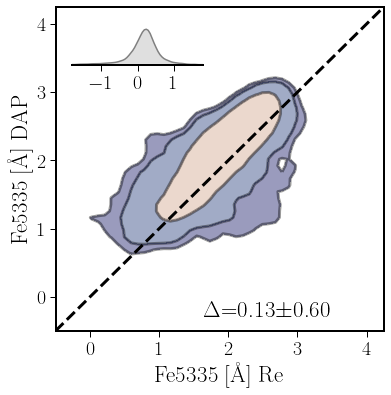

In [311]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap['Fe5335_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_Fe5335_dap],\
          x_label=r'Fe5335 [\AA] Re',\
                       y_label=r'Fe5335 [\AA] DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.5,x_max=4.25)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Fe5335_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

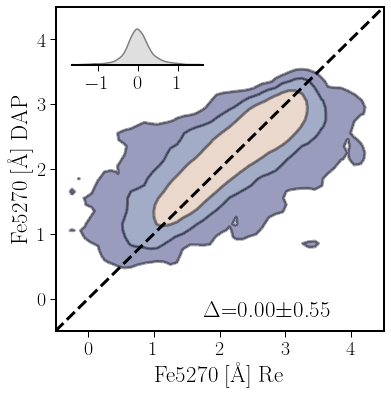

In [312]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap['Fe5270_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_Fe5270_dap],\
          x_label=r'Fe5270 [\AA] Re',\
                       y_label=r'Fe5270 [\AA] DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.5,x_max=4.5)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Fe5270_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

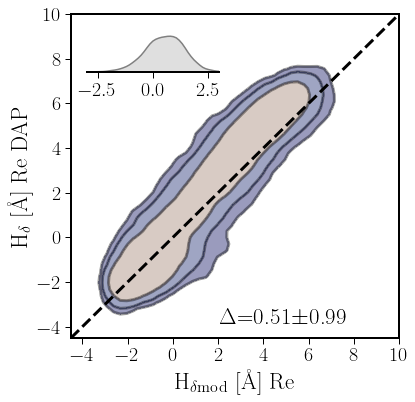

In [313]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap['Hdmod_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_HDeltaA_dap],\
          x_label=r'H$_{\delta\rm mod}$ [\AA]  Re',\
                       y_label=r'H$_\delta$  [\AA] Re DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-4.5,x_max=10,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Hdmod_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

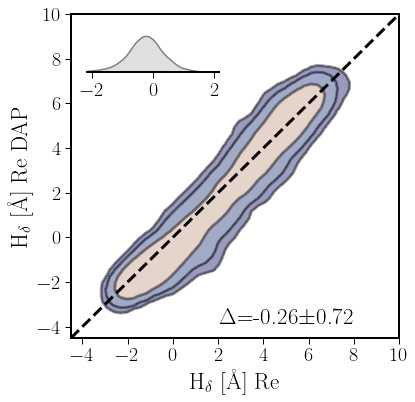

In [314]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap['Hd_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_HDeltaA_dap],\
          x_label=r'H$_\delta$  [\AA] Re',\
                       y_label=r'H$_\delta$  [\AA] Re DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-4.5,x_max=10)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Hd_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

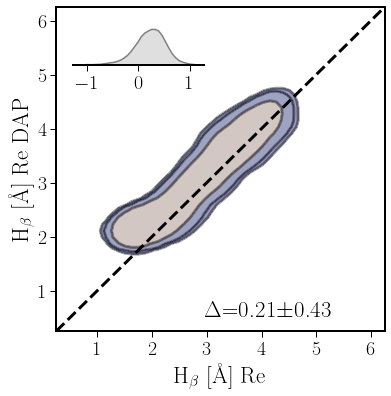

In [315]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap['Hb_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_Hb_dap],\
          x_label=r'H$_\beta$ [\AA] Re',\
                       y_label=r'H$_\beta$ [\AA] Re DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=0.25,x_max=6.25)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Hb_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

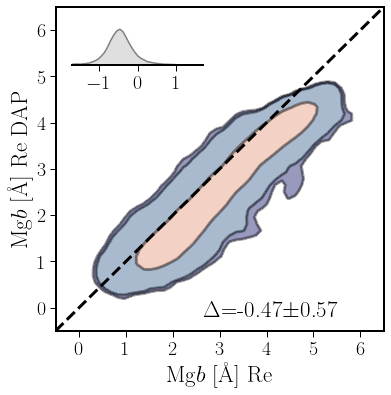

In [316]:
# Comparing indices:

#D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=1.1619*tab_DR17_dap['Mgb_Re_fit'],\
                       y_par=tab_DR17_dap['SPECINDEX_1RE'][:,ni_Mgb_dap],\
          x_label=r'Mg$b$ [\AA] Re',\
                       y_label=r'Mg$b$ [\AA] Re DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.5,x_max=6.5)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_Mgb_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

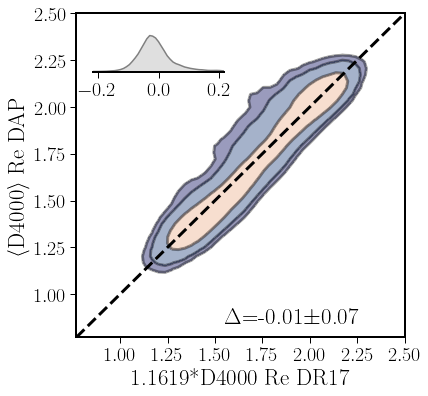

In [317]:
# Comparing indices:

D4000_mean_dap=0.5*(tab_DR17_dap['SPECINDEX_1RE'][:,ni_D4000_dap]+tab_DR17_dap['SPECINDEX_1RE'][:,ni_Dn4000_dap])
fig,ax,mean,std=comp_plot(x_par=1.1619*tab_DR17_dap['D4000_Re_fit1'],\
                       y_par=D4000_mean_dap,\
          x_label=r'1.1619*D4000 Re DR17',\
                       y_label=r'$\langle$D4000$\rangle$ Re DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=0.77,x_max=2.5)#,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_ind_D4000_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#list_columns(tab_DR17_dap.columns)
#print(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,0])

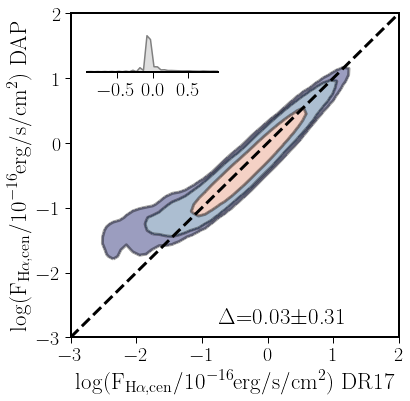

In [318]:

#
# F_Ha Comparison
#
mask_now = (tab_DR17_dap['F_Ha_cen']>0) #& (tab_DR17_DR15['DR15_F_Ha_cen']>0)
tab_DR17_dap_mask=tab_DR17_dap[mask_now]
fig,ax,mean,std=comp_plot(x_par=np.log10(np.abs(tab_DR17_dap_mask['F_Ha_cen'])),\
                       y_par=np.log10(np.abs(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Ha_dap])),\
          x_label=r'log(F$_{\rm H\alpha,\rm cen}$/10$^{-16}$erg/s/cm$^2$) DR17',\
                       y_label=r'log(F$_{\rm H\alpha,\rm cen}$/10$^{-16}$erg/s/cm$^2$) DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-3,x_max=2)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_F_Ha_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [319]:
tab_DR17_dap_mask.add_column(tab_DR17_dap_mask['EW_Ha_cen']/tab_DR17_dap_mask['F_Ha_cen']*tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Ha_dap],name='DAP_EW_Ha_cen')



In [320]:
tab_DR17_dap_mask.add_column(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Ha_dap]/tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Hb_dap],name='DAP_Ha_Hb_cen')

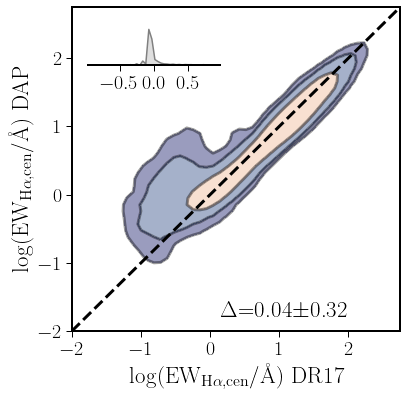

In [321]:
fig,ax,mean,std=comp_plot(x_par=np.log10(np.abs(tab_DR17_dap_mask['EW_Ha_cen'])),\
                       y_par=np.log10(np.abs(tab_DR17_dap_mask['DAP_EW_Ha_cen'])),\
          x_label=r'log(EW$_{\rm H\alpha,\rm cen}$/\AA) DR17',\
                       y_label=r'log(EW$_{\rm H\alpha,\rm cen}$/\AA) DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-2.0,x_max=2.75)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_EW_Ha_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

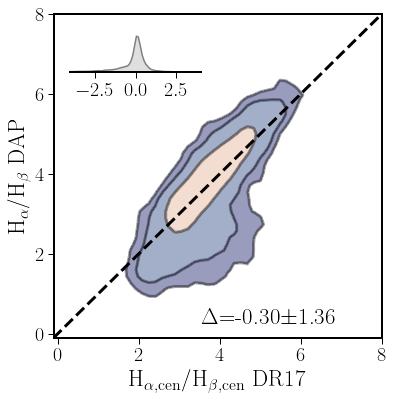

In [322]:
#scatter=0,alpha=0.4,x_min=0.15,x_max=0.99)
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['Ha_Hb_cen'],\
                       y_par=tab_DR17_dap_mask['DAP_Ha_Hb_cen'],\
          x_label=r'H$_{\alpha,\rm cen}$/H$_{\beta,\rm cen}$ DR17',\
                       y_label=r'H$_\alpha$/H$_\beta$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=8)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_Ha_Hb_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

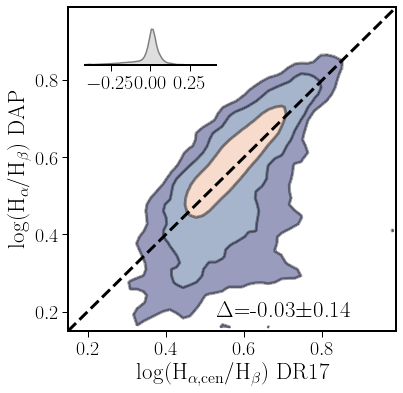

In [323]:
#scatter=0,alpha=0.4,x_min=0.15,x_max=0.99)
fig,ax,mean,std=comp_plot(x_par=np.log10(tab_DR17_dap_mask['Ha_Hb_cen']),\
                       y_par=np.log10(tab_DR17_dap_mask['DAP_Ha_Hb_cen']),\
          x_label=r'log(H$_{\alpha,\rm cen}$/H$_{\beta}$) DR17',\
                       y_label=r'log(H$_\alpha$/H$_\beta$) DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=0.15,x_max=0.99)
#scatter=0,alpha=0.4,x_min=-0.1,x_max=8)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_log_Ha_Hb_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [324]:
tab_DR17_dap_mask.add_column(np.log10(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_OIII_dap]/tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Hb_dap]),name='DAP_log_OIII_Hb_cen')

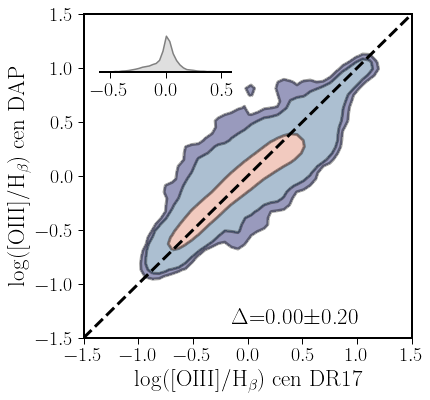

In [325]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_OIII_Hb_cen'],\
                       y_par=tab_DR17_dap_mask['DAP_log_OIII_Hb_cen'],\
          x_label=r'log([OIII]/H$_{\beta}$) cen DR17',\
                       y_label=r'log([OIII]/H$_{\beta}$) cen DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.5,x_max=1.5)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_OIII_Hb_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


In [326]:
tab_DR17_dap_mask.add_column(np.log10(tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_NII_dap]/tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Ha_dap]),name='DAP_log_NII_Ha_cen')
tab_DR17_dap_mask.add_column(np.log10((tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_SII17_dap]+tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_SII31_dap])/tab_DR17_dap_mask['EMLINE_SFLUX_CEN'][:,n_Ha_dap]),name='DAP_log_SII_Ha_cen')

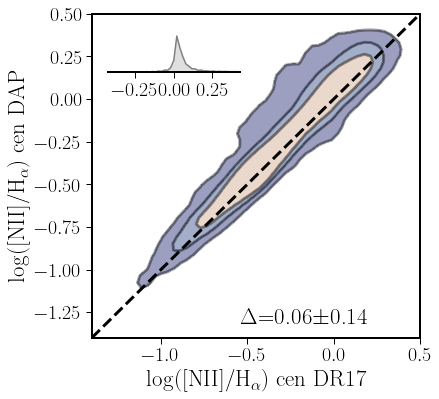

In [327]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_NII_Ha_cen'],\
                       y_par=tab_DR17_dap_mask['DAP_log_NII_Ha_cen'],\
          x_label=r'log([NII]/H$_{\alpha}$) cen DR17',\
                       y_label=r'log([NII]/H$_{\alpha}$) cen DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.4,x_max=0.5,conts=[0.99,0.8,0.6,0])

fig.tight_layout()
fig.savefig("comp_NII_Ha_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")


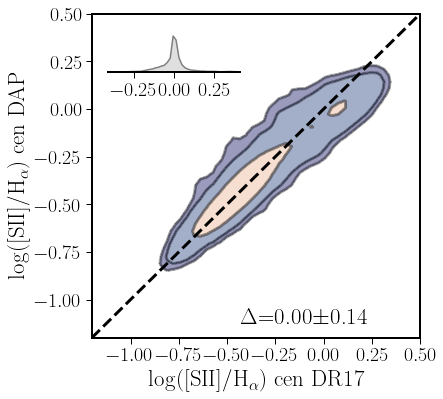

In [328]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_SII_Ha_cen'],\
                       y_par=tab_DR17_dap_mask['DAP_log_SII_Ha_cen'],\
          x_label=r'log([SII]/H$_{\alpha}$) cen DR17',\
                       y_label=r'log([SII]/H$_{\alpha}$) cen DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.2,x_max=0.5)#,conts=[0.99,0.8,0.6,0])

fig.tight_layout()
fig.savefig("comp_SII_Ha_cen_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [329]:
#
#
#
#s_res_Ha=45
#x_par=np.sqrt((tab_DR17_dap_mask['vel_disp_Ha_1Re'][mask_zeros])**2-s_res_Ha**2)
#sig_res=75
#y_par=np.sqrt((tab_DR17_dap_mask['vel_disp_ssp_1Re'][mask_zeros])**2+sig_res**2)*1.15-41


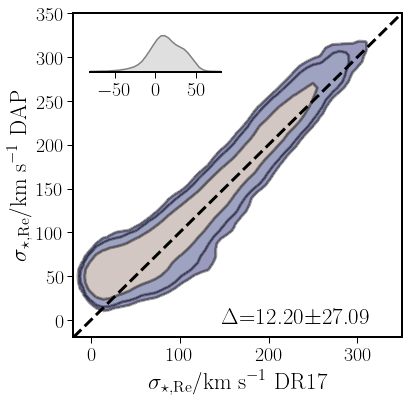

In [330]:

x_par=tab_DR17_dap['vel_disp_ssp_1Re']
y_par=tab_DR17_dap['STELLAR_SIGMA_1RE']

fig,ax,mean,std=comp_plot(x_par=x_par,y_par=y_par,\
          x_label=r'$\sigma_{\star,\rm Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\sigma_{\star,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350,conts=[0.95,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_ssp_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

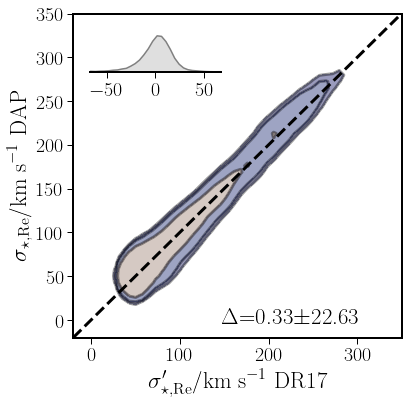

In [331]:

x_par=tab_DR17_dap['vel_disp_ssp_1Re_cor']
y_par=tab_DR17_dap['STELLAR_SIGMA_1RE']

fig,ax,mean,std=comp_plot(x_par=x_par,y_par=y_par,\
          x_label=r'$\sigma^\prime_{\star,\rm Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\sigma_{\star,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350,conts=[0.95,0.8,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_ssp_DAP_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

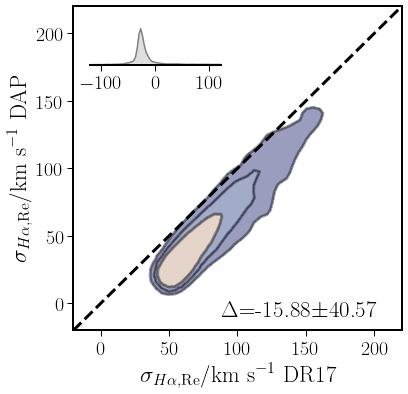

In [332]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['vel_disp_Ha_1Re'],y_par=tab_DR17_dap_mask['HA_GSIGMA_1RE'],\
          x_label=r'$\sigma_{H\alpha,\rm Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\sigma_{H\alpha,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=220,conts=[1.00,0.8,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_gas_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

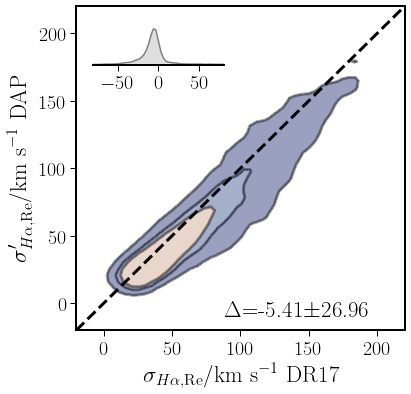

In [333]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['vel_disp_Ha_1Re_cor'],y_par=tab_DR17_dap_mask['HA_GSIGMA_1RE'],\
          x_label=r'$\sigma_{H\alpha,\rm Re}$/km\ s$^{-1}$ DR17',\
                       y_label=r'$\sigma^\prime_{H\alpha,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=220,conts=[1.00,0.8,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_gas_DAP_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

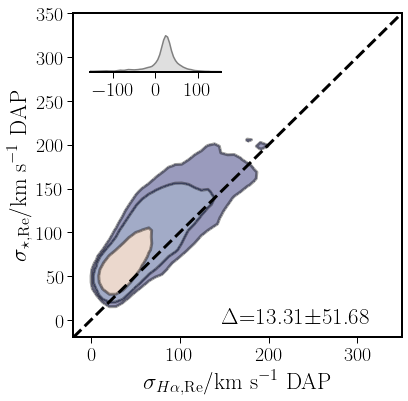

In [334]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['HA_GSIGMA_1RE'],y_par=tab_DR17_dap_mask['STELLAR_SIGMA_1RE'],\
          x_label=r'$\sigma_{H\alpha,\rm Re}$/km s$^{-1}$ DAP',\
                       y_label=r'$\sigma_{\star,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_both_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

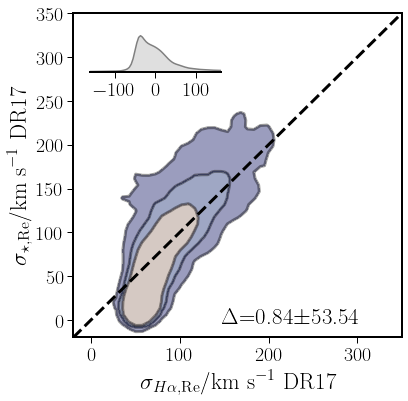

In [335]:
mask_zeros = tab_DR17_dap_mask['vel_disp_Ha_1Re']>0
x_par=tab_DR17_dap_mask['vel_disp_Ha_1Re'][mask_zeros]
y_par=tab_DR17_dap_mask['vel_disp_ssp_1Re'][mask_zeros]
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'$\sigma_{H\alpha,\rm Re}$/km s$^{-1}$ DR17',\
                       y_label=r'$\sigma_{\star,\rm Re}$/km s$^{-1}$ DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350)#,conts=[0.95,0.8,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_both_Pipe3D.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

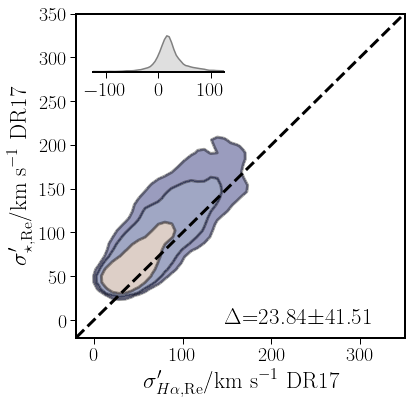

In [336]:
mask_zeros = tab_DR17_dap_mask['vel_disp_Ha_1Re']>0
x_par=tab_DR17_dap_mask['vel_disp_Ha_1Re_cor'][mask_zeros]
y_par=tab_DR17_dap_mask['vel_disp_ssp_1Re_cor'][mask_zeros]
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'$\sigma^\prime_{H\alpha,\rm Re}$/km s$^{-1}$ DR17',\
                       y_label=r'$\sigma^\prime_{\star,\rm Re}$/km s$^{-1}$ DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350,conts=[0.95,0.8,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_both_Pipe3D_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

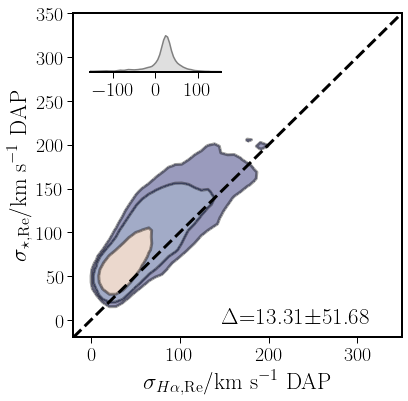

In [337]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['HA_GSIGMA_1RE'],y_par=tab_DR17_dap_mask['STELLAR_SIGMA_1RE'],\
          x_label=r'$\sigma_{H\alpha,\rm Re}$/km s$^{-1}$ DAP',\
                       y_label=r'$\sigma_{\star,\rm Re}$/km s$^{-1}$ DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=-20,x_max=350,conts=[1.00,0.9,0.65,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_disp_both_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

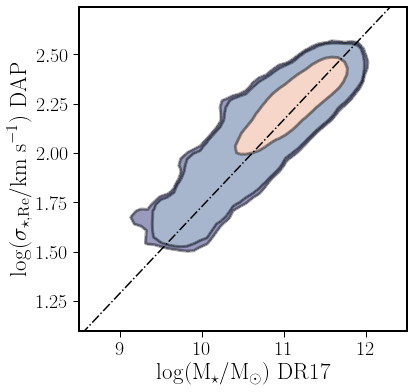

In [405]:
mask_RG = np.abs(tab_DR17_dap_mask['EW_Ha_Re'])<3

fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_RG],\
                          y_par=np.log10(tab_DR17_dap_mask['STELLAR_SIGMA_1RE'][mask_RG]),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma_{\star,\rm Re}$/km s$^{-1}$) DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=8.5,x_max=12.5,\
                          y_min=1.1,y_max=2.74, equal=False,one=False)#conts=[0.99,0.68,0.3,0])

x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')


fig.tight_layout()
fig.savefig("comp_Mass_Disp_ssp_DAP.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

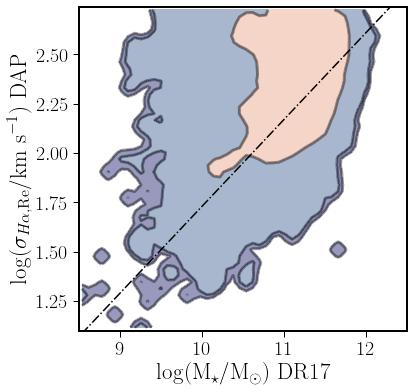

In [406]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_RG],\
                          y_par=np.log10(tab_DR17_dap_mask['HA_GSIGMA_1RE'][mask_RG]),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma_{H\alpha,\rm Re}$/km s$^{-1}$) DAP',
          c_main='black',scatter=0,alpha=0.4,x_min=8.5,x_max=12.5,\
                          y_min=1.1,y_max=2.74, equal=False,one=False)#conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_Mass_Disp_Ha.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

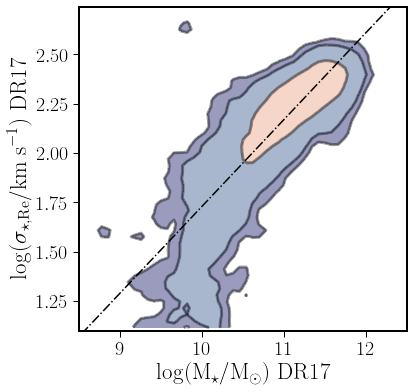

In [407]:
y_par=tab_DR17_dap_mask['vel_disp_ssp_1Re'][mask_RG]
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_RG],\
                          y_par=np.log10(y_par),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma_{\star,\rm Re}$/km s$^{-1}$) DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=8.5,x_max=12.5,\
                          y_min=1.1,y_max=2.74, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_Mass_Disp_ssp_dr17.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

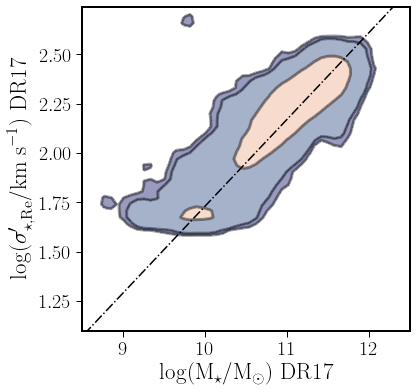

In [408]:
y_par=tab_DR17_dap_mask['vel_disp_ssp_1Re_cor'][mask_RG]
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_RG],\
                          y_par=np.log10(y_par),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma^\prime_{\star,\rm Re}$/km s$^{-1}$) DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=8.5,x_max=12.5,\
                          y_min=1.1,y_max=2.74, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_Mass_Disp_ssp_dr17_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

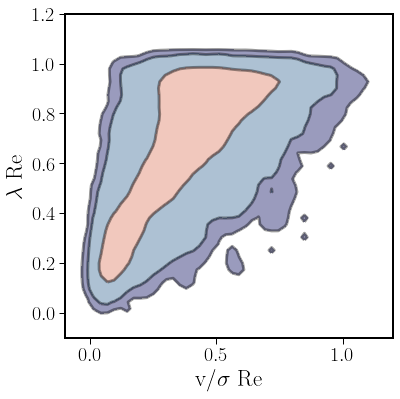

In [409]:
fig,ax,mean,std=comp_plot(x_par=tab['vel_sigma_Re'],\
                          y_par=tab['Lambda_Re'],\
          x_label=r'v/$\sigma$ Re',\
                       y_label=r'$\lambda$ Re',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.1,x_max=1.2,\
                          y_min=-0.1,y_max=1.2, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
#x_mod = np.linspace(8,13,100)
#y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
#ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_sigma_lambda.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

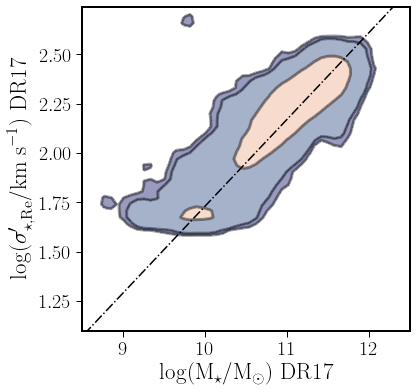

In [410]:
y_par=tab_DR17_dap_mask['vel_disp_ssp_1Re_cor'][mask_RG]
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_RG],\
                          y_par=np.log10(y_par),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma^\prime_{\star,\rm Re}$/km s$^{-1}$) DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=8.5,x_max=12.5,\
                          y_min=1.1,y_max=2.74, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* (x_mod+0.27)
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_Mass_Disp_ssp_dr17_cor.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [411]:
#s_res_Ha=75
#y_par=np.sqrt((tab_DR17_dap_mask['vel_disp_Ha_1Re'][mask_zeros & mask_RG])**2-s_res_Ha**2)
#fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_zeros & mask_RG],\
#                          y_par=np.log10(

In [412]:
tab_DR17_dap_mask['vel_disp_Ha_1Re'][mask_zeros & mask_RG]

<Column name='vel_disp_Ha_1Re' dtype='float64' length=2188>
82.0904485016835
181.286393449277
117.821236316866
41.0326064385446
148.968097183819
96.1169308279377
 123.32859226034
1.15447560248414
143.501005559316
292.578453233119
122.808036644486
 141.89609969749
             ...
 35.414363416422
136.507752515597
157.903297100184
95.7720913706504
238.546657112978
296.099753586692
99.6411116186357
 112.92976115429
90.2584991387621
 477.79095456138
139.928888380672
125.026501727443

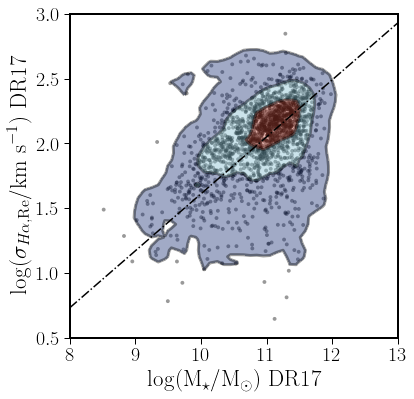

In [413]:
s_res_Ha=45
y_par=np.sqrt((tab_DR17_dap_mask['vel_disp_Ha_1Re'][mask_zeros & mask_RG])**2-s_res_Ha**2)
fig,ax,mean,std=comp_plot(x_par=tab_DR17_dap_mask['log_Mass'][mask_zeros & mask_RG],\
                          y_par=np.log10(y_par),\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'log($\sigma_{H\alpha,\rm Re}$/km s$^{-1}$) DR17',
          c_main='black',scatter=1,alpha=0.4,x_min=8,x_max=13,\
                          y_min=0.5,y_max=3, equal=False,one=False,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* x_mod
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')

fig.tight_layout()
fig.savefig("comp_Mass_Disp_Ha_dr17.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

#
# Comparison with Firefly
#

In [414]:
# tables/dapall-v3_1_1-3.1.0.fits
hdu_ff=fits.open("tables/manga-firefly-globalprop-v3_1_1-mastar.fits")#SDSS17Pipe3D_v3_1_1.fits")
hdr_ff=hdu_ff[0].header
tab_ffi=Table(hdu_ff[1].data) 
tab_ffp=Table(hdu_ff[2].data) 
tab_ffg=Table(hdu_ff[3].data) 
names_ff=[]
for plateifu in tab_ffi['PLATEIFU']:
    names_ff.append('manga-'+plateifu)
#print(names_ff)
tab_ffi.add_column(names_ff,name='name')
tab_ffp.add_column(names_ff,name='name')
tab_ffg.add_column(names_ff,name='name')
#print('done')

In [415]:
list_columns(tab_ffi.columns)

MANGAID             IFUDSGN             REDSHIFT            MANGADAP_ver        
PLATEIFU            OBJRA               PHOTOMETRIC_MASS    FIREFLY_ver         
PLATE               OBJDEC              MANGADRP_ver        name                


In [416]:
#list_columns(tab_ffp['name'])

#tab_ff=join(tab_ffi,tab_ffp)

In [417]:
#list_columns(tab_ffi.columns)
tab_ff=join(tab_ffi,tab_ffp)
tab_ff=join(tab_ff,tab_ffg)
print('done')

done


In [418]:
list_columns(tab_ff.columns)

MANGAID                   name                      MW_AGE_3ARCSEC            MW_AGE_GRADIENT_ERROR     
PLATEIFU                  LW_AGE_1Re                MW_AGE_3ARCSEC_ERROR      MW_AGE_ZEROPOINT          
PLATE                     LW_AGE_1Re_ERROR          LW_Z_3ARCSEC              MW_AGE_ZEROPOINT_ERROR    
IFUDSGN                   MW_AGE_1Re                LW_Z_3ARCSEC_ERROR        LW_Z_GRADIENT             
OBJRA                     MW_AGE_1Re_ERROR          MW_Z_3ARCSEC              LW_Z_GRADIENT_ERROR       
OBJDEC                    LW_Z_1Re                  MW_Z_3ARCSEC_ERROR        LW_Z_ZEROPOINT            
REDSHIFT                  LW_Z_1Re_ERROR            LW_AGE_GRADIENT           LW_Z_ZEROPOINT_ERROR      
PHOTOMETRIC_MASS          MW_Z_1Re                  LW_AGE_GRADIENT_ERROR     MW_Z_GRADIENT             
MANGADRP_ver              MW_Z_1Re_ERROR            LW_AGE_ZEROPOINT          MW_Z_GRADIENT_ERROR       
MANGADAP_ver              LW_AGE_3ARCSEC            LW_

In [419]:
tab_DR17_ff=join(tab,tab_ff,keys=['name'])

In [420]:
#list_columns(tab_DR17_ff.columns)
print(len(tab_DR17_ff['LW_AGE_1Re']))

9825


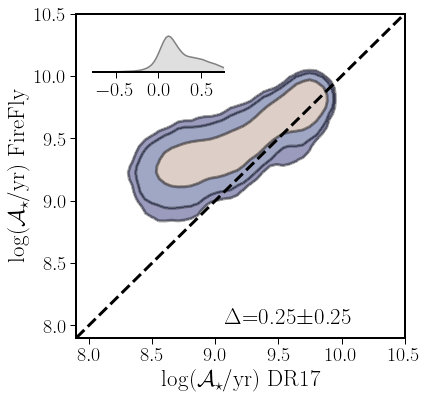

In [421]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['Age_LW_Re_fit'],y_par=9.0+tab_DR17_ff['LW_AGE_1Re'],\
          x_label=r'log($\mathcal{A}_\star$/yr) DR17',\
                       y_label=r'log($\mathcal{A}_\star$/yr) FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=7.9,x_max=10.5)

fig.tight_layout()
fig.savefig("comp_Age_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

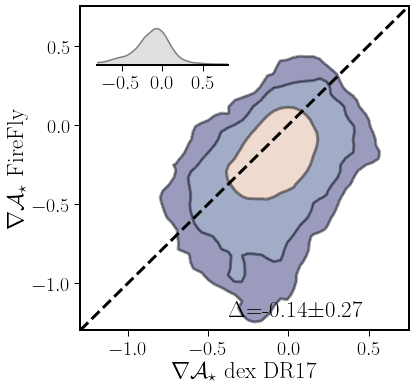

In [422]:
#mask_now = 
#mask_now = (tab_DR17_ff['FoV']>2.0) & (tab_DR17_ff['Re_arc']>2)
#mask_now =  (tab_DR17_ff['Re_arc']>5) & (tab_DR17_ff['nsa_inclination']<75) & (tab_DR17_ff['FoV']>2)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['alpha_Age_LW_Re_fit'],\
                          y_par=tab_DR17_ff['LW_AGE_GRADIENT'],\
          x_label=r'$\nabla\mathcal{A}_\star$ dex DR17',\
                       y_label=r'$\nabla\mathcal{A}_\star$ FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.3,x_max=0.75)

fig.tight_layout()
fig.savefig("comp_slope_Age_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

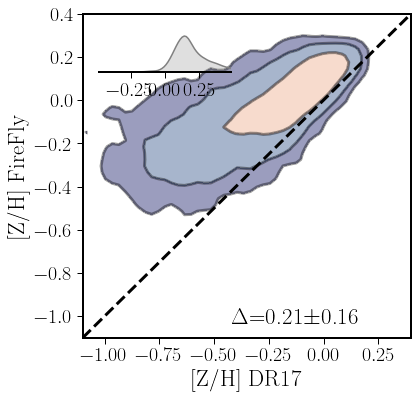

In [423]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['ZH_LW_Re_fit'],y_par=tab_DR17_ff['LW_Z_1Re'],\
          x_label=r'[Z/H] DR17',\
                       y_label=r'[Z/H] FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=-1.1,x_max=0.4)

fig.tight_layout()
fig.savefig("comp_ZH_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

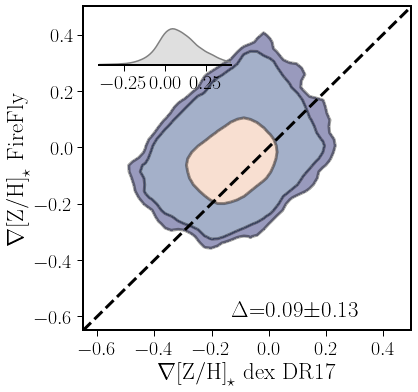

In [424]:
mask_now = (tab_DR17_ff['alpha_ZH_LW_Re_fit'] !=0) & (tab_DR17_ff['LW_Z_GRADIENT']>-3)

fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['alpha_ZH_LW_Re_fit'][mask_now],y_par=tab_DR17_ff['LW_Z_GRADIENT'][mask_now],\
          x_label=r'$\nabla{\rm [Z/H]}_\star$ dex DR17',\
                       y_label=r'$\nabla{\rm [Z/H]}_\star$ FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=-0.65,x_max=0.5)

fig.tight_layout()
fig.savefig("comp_slope_ZH_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

(-0.5, 0.5)

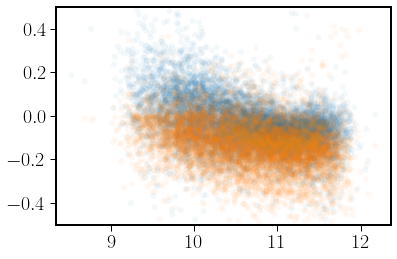

In [425]:
plt.scatter(tab_DR17_ff['log_Mass'][mask_now],tab_DR17_ff['LW_Z_GRADIENT'][mask_now],alpha=0.05,edgecolor='none')
plt.scatter(tab_DR17_ff['log_Mass'][mask_now],tab_DR17_ff['alpha_ZH_LW_Re_fit'][mask_now],alpha=0.05,edgecolor='none')
plt.ylim(-0.5,0.5)

-0.037310705 0.11848755


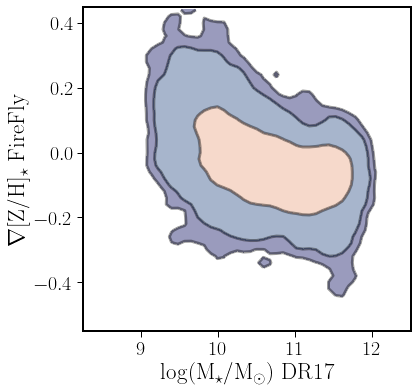

In [426]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['log_Mass'][mask_now],\
                          y_par=tab_DR17_ff['LW_Z_GRADIENT'][mask_now],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'$\nabla$[Z/H]$_\star$ FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=8.25,x_max=12.5,\
                          y_min=-0.55,y_max=0.45, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* x_mod
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')
print(np.nanmean(tab_DR17_ff['LW_Z_GRADIENT'][mask_now]),np.nanstd(tab_DR17_ff['LW_Z_GRADIENT'][mask_now]))
fig.tight_layout()
fig.savefig("comp_Mass_grad_ZH_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

-0.12442482669080784 0.11036588831588365


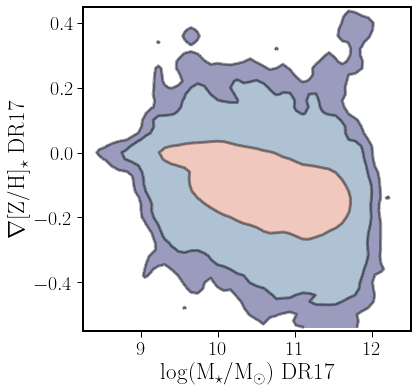

In [427]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['log_Mass'],\
                          y_par=tab_DR17_ff['alpha_ZH_LW_Re_fit'],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'$\nabla$[Z/H]$_\star$ DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=8.25,x_max=12.5,\
                          y_min=-0.55,y_max=0.45, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* x_mod
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')
print(np.nanmean(tab_DR17_ff['alpha_ZH_LW_Re_fit'][mask_now]),np.nanstd(tab_DR17_ff['alpha_ZH_LW_Re_fit'][mask_now]))
fig.tight_layout()
fig.savefig("comp_Mass_grad_ZH_DR17.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

-0.25028908 0.31629932


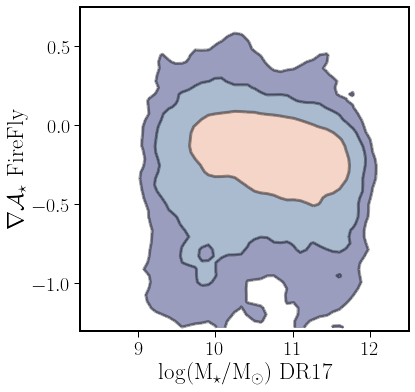

In [428]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['log_Mass'][mask_now],\
                          y_par=tab_DR17_ff['LW_AGE_GRADIENT'][mask_now],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'$\nabla\mathcal{A}_\star$ FireFly',
          c_main='black',scatter=0,alpha=0.4,x_min=8.25,x_max=12.5,\
                          y_min=-1.3,y_max=0.75, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* x_mod
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')
print(np.nanmean(tab_DR17_ff['LW_AGE_GRADIENT'][mask_now]),np.nanstd(tab_DR17_ff['LW_AGE_GRADIENT'][mask_now]))
fig.tight_layout()
fig.savefig("comp_Mass_grad_AGE_ff.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

-0.09919590745490588 0.22938139346912018


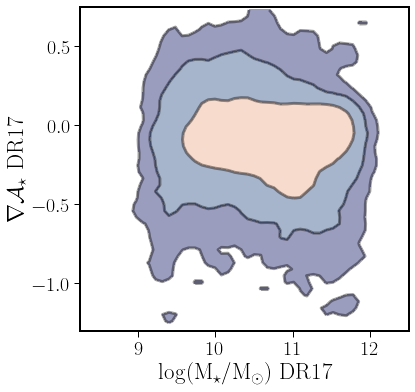

In [429]:
fig,ax,mean,std=comp_plot(x_par=tab_DR17_ff['log_Mass'][mask_now],\
                          y_par=tab_DR17_ff['alpha_Age_LW_Re_fit'][mask_now],\
          x_label=r'log(M$_\star$/M$_\odot$) DR17',\
                       y_label=r'$\nabla\mathcal{A}_\star$ DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=8.25,x_max=12.5,\
                          y_min=-1.3,y_max=0.75, equal=False,one=False)#,conts=[0.99,0.68,0.3,0])
x_mod = np.linspace(8,13,100)
y_mod = -2.79 +0.44* x_mod
#print(x_mod,y_mod)
ax.plot(x_mod,y_mod,color='black',ls='-.')
print(np.nanmean(tab_DR17_ff['alpha_Age_LW_Re_fit'][mask_now]),np.nanstd(tab_DR17_ff['alpha_Age_LW_Re_fit'][mask_now]))
fig.tight_layout()
fig.savefig("comp_Mass_grad_AGE_DR17.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [430]:
#'OH_Mar13_N2_Re_fit','e_OH_Mar13_N2_Re_fit','OH_Mar13_N2_alpha_fit','e_OH_Mar13_N2_alpha_fit','OH_Mar13_O3N2_Re_fit','e_OH_Mar13_O3N2_Re_fit','OH_Mar13_O3N2_alpha_fit','e_OH_Mar13_O3N2_alpha_fit','OH_T04_Re_fit','e_OH_T04_Re_fit','OH_T04_alpha_fit','e_OH_T04_alpha_fit','OH_Pet04_N2_lin_Re_fit','e_OH_Pet04_N2_lin_Re_fit','OH_Pet04_N2_lin_alpha_fit','e_OH_Pet04_N2_lin_alpha_fit','OH_Pet04_N2_poly_Re_fit','e_OH_Pet04_N2_poly_Re_fit','OH_Pet04_N2_poly_alpha_fit','e_OH_Pet04_N2_poly_alpha_fit','OH_Pet04_O3N2_Re_fit','e_OH_Pet04_O3N2_Re_fit','OH_Pet04_O3N2_alpha_fit','e_OH_Pet04_O3N2_alpha_fit','OH_Kew02_N2O2_Re_fit','e_OH_Kew02_N2O2_Re_fit','OH_Kew02_N2O2_alpha_fit','e_OH_Kew02_N2O2_alpha_fit','OH_Pil10_ONS_Re_fit','e_OH_Pil10_ONS_Re_fit','OH_Pil10_ONS_alpha_fit','e_OH_Pil10_ONS_alpha_fit','OH_Pil10_ON_Re_fit','e_OH_Pil10_ON_Re_fit','OH_Pil10_ON_alpha_fit','e_OH_Pil10_ON_alpha_fit','OH_Pil11_NS_Re_fit','e_OH_Pil11_NS_Re_fit','OH_Pil11_NS_alpha_fit','e_OH_Pil11_NS_alpha_fit','OH_Cur20_RS32_Re_fit','e_OH_Cur20_RS32_Re_fit','OH_Cur20_RS32_alpha_fit','e_OH_Cur20_RS32_alpha_fit','OH_Cur20_R3_Re_fit','e_OH_Cur20_R3_Re_fit','OH_Cur20_R3_alpha_fit','e_OH_Cur20_R3_alpha_fit','OH_Cur20_O3O2_Re_fit','e_OH_Cur20_O3O2_Re_fit','OH_Cur20_O3O2_alpha_fit','e_OH_Cur20_O3O2_alpha_fit','OH_Cur20_S2_Re_fit','e_OH_Cur20_S2_Re_fit','OH_Cur20_S2_alpha_fit','e_OH_Cur20_S2_alpha_fit','OH_Cur20_R2_Re_fit','e_OH_Cur20_R2_Re_fit','OH_Cur20_R2_alpha_fit','e_OH_Cur20_R2_alpha_fit','OH_Cur20_N2_Re_fit','e_OH_Cur20_N2_Re_fit','OH_Cur20_N2_alpha_fit','e_OH_Cur20_N2_alpha_fit','OH_Cur20_R23_Re_fit','e_OH_Cur20_R23_Re_fit','OH_Cur20_R23_alpha_fit','e_OH_Cur20_R23_alpha_fit','OH_Cur20_O3N2_Re_fit','e_OH_Cur20_O3N2_Re_fit','OH_Cur20_O3N2_alpha_fit','e_OH_Cur20_O3N2_alpha_fit','OH_Cur20_O3S2_Re_fit','e_OH_Cur20_O3S2_Re_fit','OH_Cur20_O3S2_alpha_fit','e_OH_Cur20_O3S2_alpha_fit','OH_KK04_Re_fit','e_OH_KK04_Re_fit','OH_KK04_alpha_fit','e_OH_KK04_alpha_fit','OH_Pil16_R_Re_fit','e_OH_Pil16_R_Re_fit','OH_Pil16_R_alpha_fit','e_OH_Pil16_R_alpha_fit','OH_Pil16_S_Re_fit','e_OH_Pil16_S_Re_fit','OH_Pil16_S_alpha_fit','e_OH_Pil16_S_alpha_fit','OH_Ho_Re_fit','e_OH_Ho_Re_fit','OH_Ho_alpha_fit','e_OH_Ho_alpha_fit','U_Dors_O32_Re_fit','e_U_Dors_O32_Re_fit','U_Dors_O32_alpha_fit','e_U_Dors_O32_alpha_fit','U_Dors_S_Re_fit','e_U_Dors_S_Re_fit','U_Dors_S_alpha_fit','e_U_Dors_S_alpha_fit','U_Mor16_O23_fs_Re_fit','e_U_Mor16_O23_fs_Re_fit','U_Mor16_O23_fs_alpha_fit','e_U_Mor16_O23_fs_alpha_fit','U_Mor16_O23_ts_Re_fit','e_U_Mor16_O23_ts_Re_fit','U_Mor16_O23_ts_alpha_fit','e_U_Mor16_O23_ts_alpha_fit','NH_Pil16_R_Re_fit','e_NH_Pil16_R_Re_fit','NH_Pil16_R_alpha_fit','e_NH_Pil16_R_alpha_fit','NO_Pil16_R_Re_fit','e_NO_Pil16_R_Re_fit','NO_Pil16_R_alpha_fit','e_NO_Pil16_R_alpha_fit','NO_Pil16_Ho_R_Re_fit','e_NO_Pil16_Ho_R_Re_fit','NO_Pil16_Ho_R_alpha_fit','e_NO_Pil16_Ho_R_alpha_fit','NO_Pil16_N2_R2_Re_fit','e_NO_Pil16_N2_R2_Re_fit','NO_Pil16_N2_R2_alpha_fit','e_NO_Pil16_N2_R2_alpha_fit',

In [431]:
col=np.array(tab.colnames)
mask_U = np.array(['U_' in x for x in col]) 
mask_Re = np.array(['Re_fit' in x for x in col]) 
mask_e  = np.array(['e_U' not in x for x in col]) 
col_U_Re=col[mask_U & mask_Re & mask_e]
print(col_U_Re)


['U_Dors_O32_Re_fit' 'U_Dors_S_Re_fit' 'U_Mor16_O23_fs_Re_fit'
 'U_Mor16_O23_ts_Re_fit']


['U_Dors_O32_Re_fit' 'U_Dors_S_Re_fit' 'U_Mor16_O23_fs_Re_fit'
 'U_Mor16_O23_ts_Re_fit']


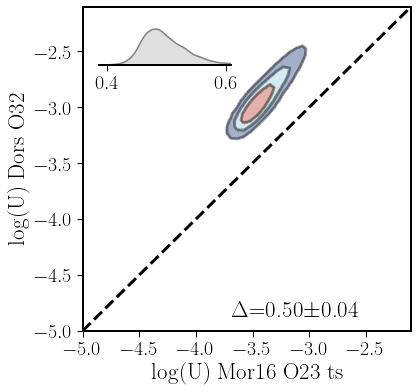

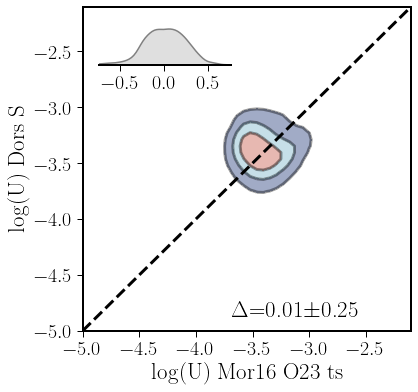

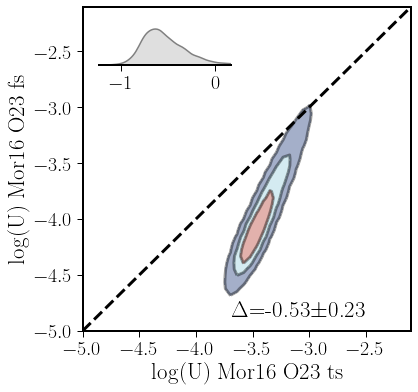

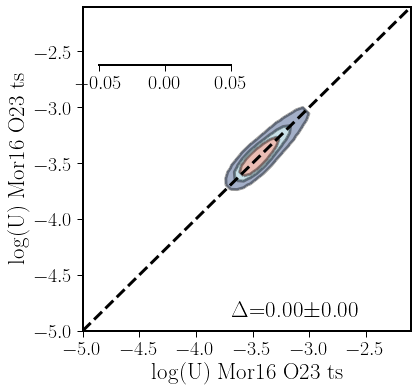

In [432]:
col=np.array(tab.colnames)
mask_U = np.array(['U_' in x for x in col]) 
mask_Re = np.array(['Re_fit' in x for x in col]) 
mask_e  = np.array(['e_U' not in x for x in col]) 
col_U_Re=col[mask_U & mask_Re & mask_e]
print(col_U_Re)

for U_name in col_U_Re:
    name_now = U_name.replace('U_','')
    name_now = name_now.replace('_Re_fit','')
    name_label = name_now.replace('_',' ')
    fig,ax,mean,std=comp_plot(x_par=tab['U_Mor16_O23_ts_Re_fit'],\
                              y_par=tab[U_name],\
                              x_label=r'log(U) Mor16 O23 ts',\
                              y_label=fr'log(U) {name_label}',\
                              c_main='black',scatter=0,alpha=0.4,x_min=-5,x_max=-2.1,\
                              offset=True,conts=[0.9,0.7,0.4,0])
    fig.tight_layout()
    name_file=f'comp_U_{name_now}.pdf'
    fig.savefig(name_file, transparent=False, facecolor='white', edgecolor='white')#.pdf")
#    print(OH_name,'|', name_now,'| ',name_file)



['NO_Pil16_R_Re_fit' 'NO_Pil16_Ho_R_Re_fit' 'NO_Pil16_N2_R2_Re_fit']


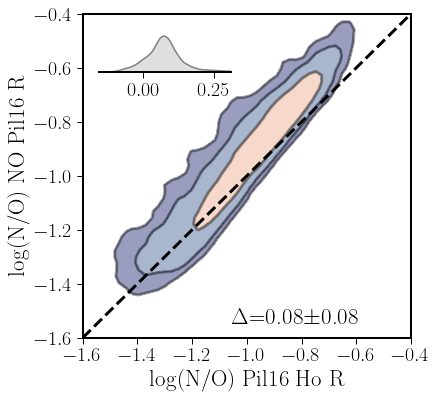

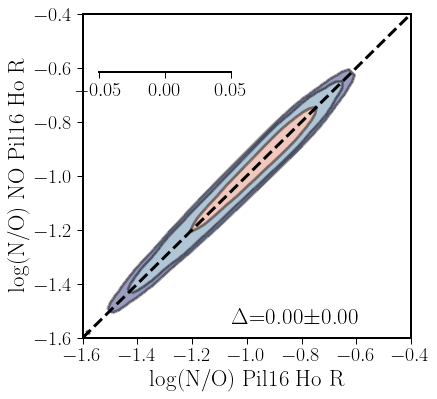

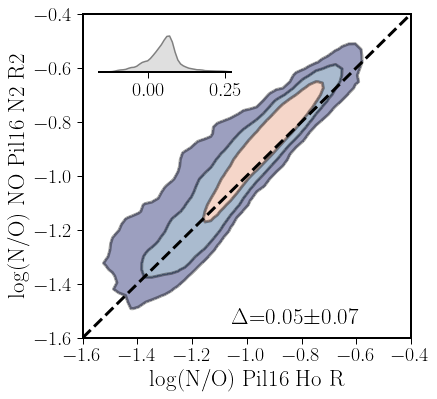

In [433]:
col=np.array(tab.colnames)
mask_NH = np.array(['NO' in x for x in col]) 
mask_Re = np.array(['Re_fit' in x for x in col]) 
mask_e  = np.array(['e_NO' not in x for x in col]) 
col_NH_Re=col[mask_NH & mask_Re & mask_e]
print(col_NH_Re)

for NH_name in col_NH_Re:
    name_now = NH_name.replace('OH_','')
    name_now = name_now.replace('_Re_fit','')
    name_label = name_now.replace('_',' ')
    fig,ax,mean,std=comp_plot(x_par=tab['NO_Pil16_Ho_R_Re_fit'],\
                              y_par=tab[NH_name],\
                              x_label=r'log(N/O) Pil16 Ho R',\
                              y_label=fr'log(N/O) {name_label}',\
                              c_main='black',scatter=0,alpha=0.4,x_min=-1.6,x_max=-0.4,\
                              offset=True,conts=[0.99,0.9,0.6,0])
    fig.tight_layout()
    name_file=f'comp_NH_{name_now}.pdf'
    fig.savefig(name_file, transparent=False, facecolor='white', edgecolor='white')#.pdf")
#    print(OH_name,'|', name_now,'| ',name_file)



OH_Mar13_N2_Re_fit | Mar13_N2 |  comp_OH_Ho_Mar13_N2.pdf
OH_Mar13_O3N2_Re_fit | Mar13_O3N2 |  comp_OH_Ho_Mar13_O3N2.pdf
OH_T04_Re_fit | T04 |  comp_OH_Ho_T04.pdf
OH_Pet04_N2_lin_Re_fit | Pet04_N2_lin |  comp_OH_Ho_Pet04_N2_lin.pdf
OH_Pet04_N2_poly_Re_fit | Pet04_N2_poly |  comp_OH_Ho_Pet04_N2_poly.pdf
OH_Pet04_O3N2_Re_fit | Pet04_O3N2 |  comp_OH_Ho_Pet04_O3N2.pdf
OH_Kew02_N2O2_Re_fit | Kew02_N2O2 |  comp_OH_Ho_Kew02_N2O2.pdf
OH_Pil10_ONS_Re_fit | Pil10_ONS |  comp_OH_Ho_Pil10_ONS.pdf
OH_Pil10_ON_Re_fit | Pil10_ON |  comp_OH_Ho_Pil10_ON.pdf
OH_Pil11_NS_Re_fit | Pil11_NS |  comp_OH_Ho_Pil11_NS.pdf
OH_Cur20_RS32_Re_fit | Cur20_RS32 |  comp_OH_Ho_Cur20_RS32.pdf
OH_Cur20_R3_Re_fit | Cur20_R3 |  comp_OH_Ho_Cur20_R3.pdf
OH_Cur20_O3O2_Re_fit | Cur20_O3O2 |  comp_OH_Ho_Cur20_O3O2.pdf
OH_Cur20_S2_Re_fit | Cur20_S2 |  comp_OH_Ho_Cur20_S2.pdf
OH_Cur20_R2_Re_fit | Cur20_R2 |  comp_OH_Ho_Cur20_R2.pdf
OH_Cur20_N2_Re_fit | Cur20_N2 |  comp_OH_Ho_Cur20_N2.pdf
OH_Cur20_R23_Re_fit | Cur20_R23 |  comp_OH_

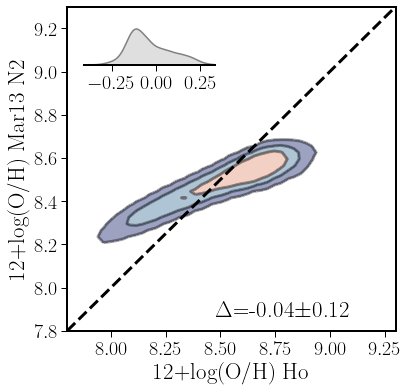

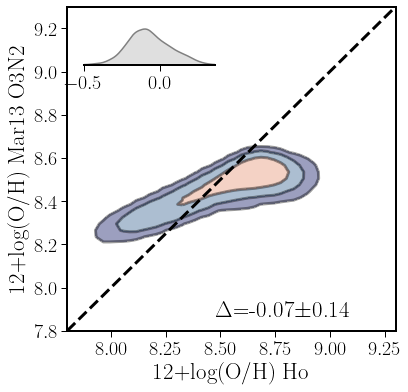

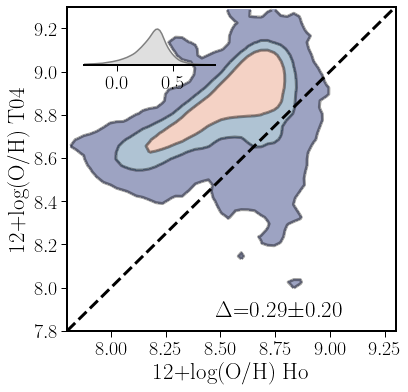

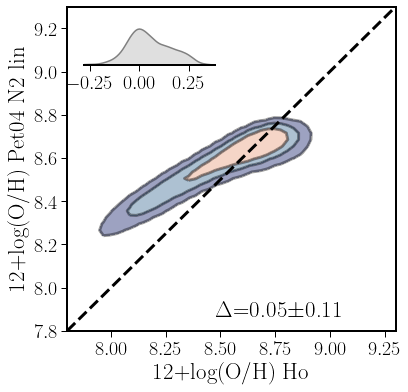

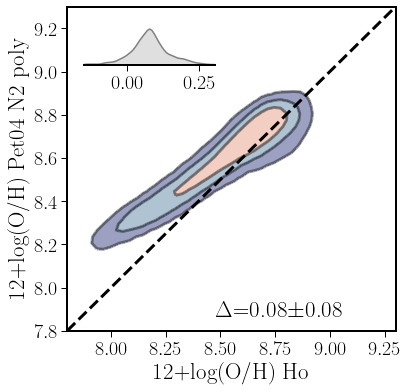

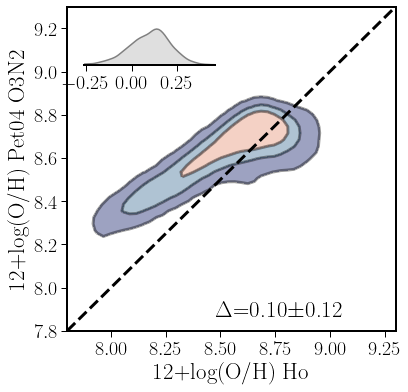

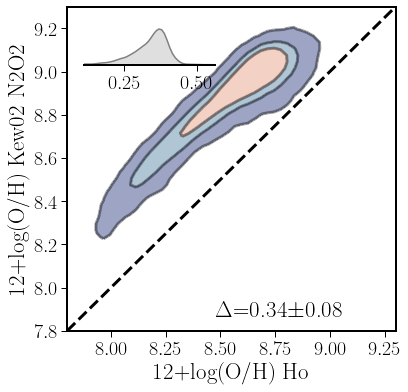

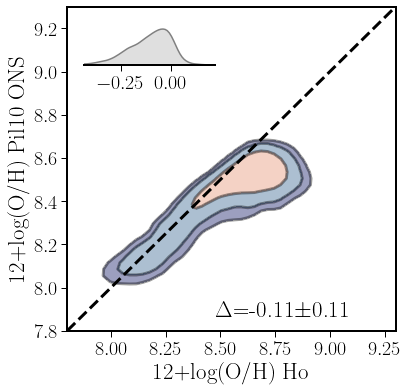

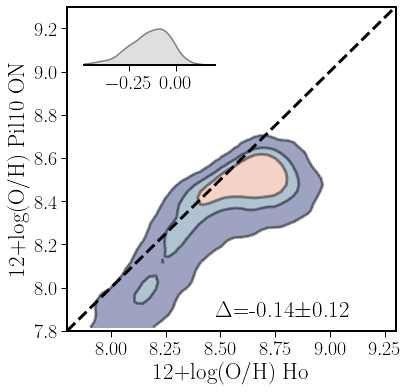

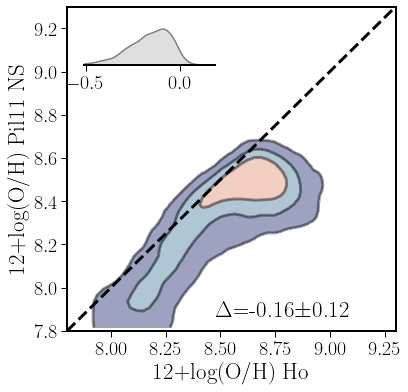

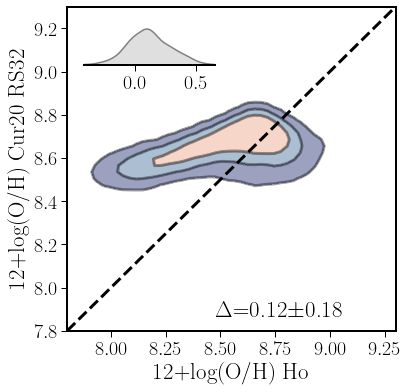

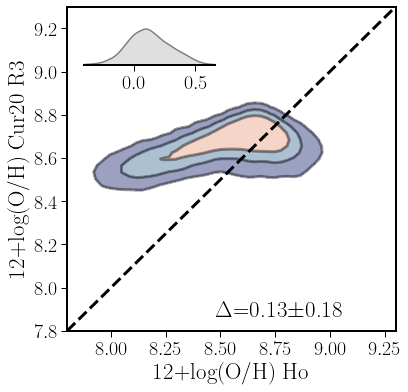

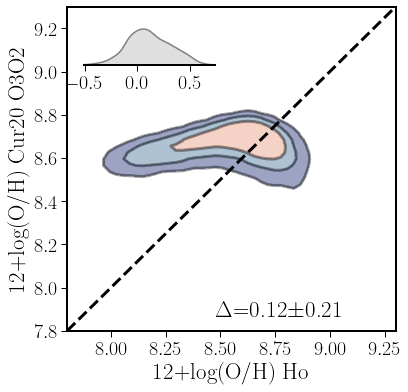

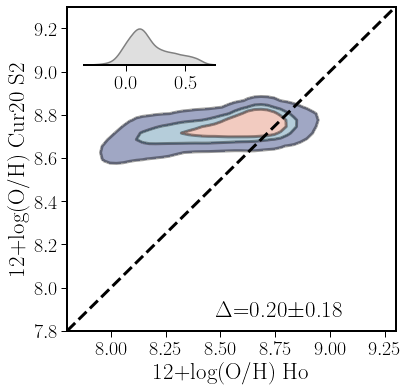

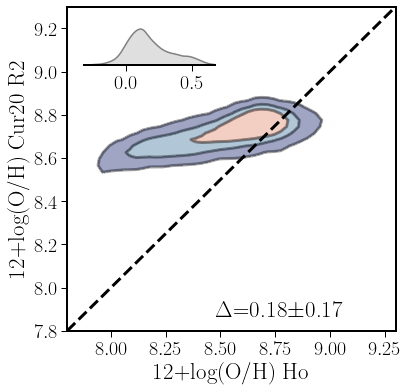

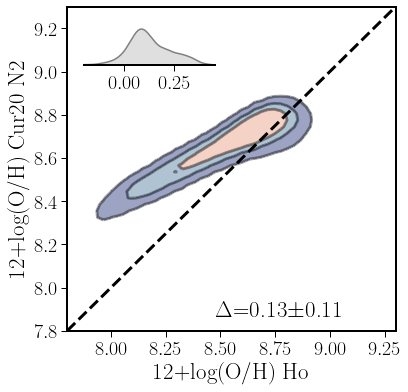

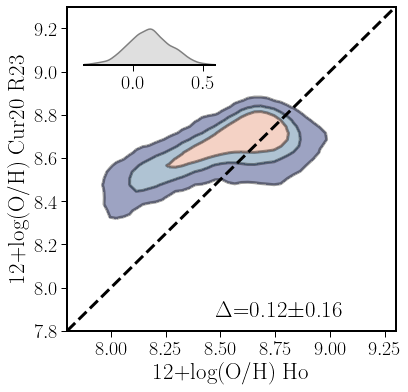

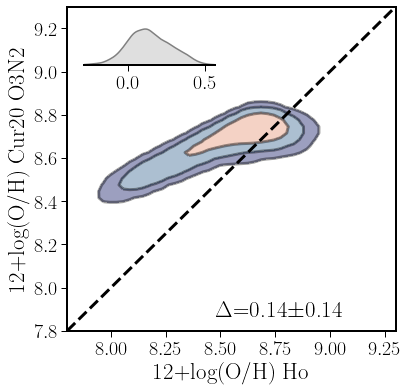

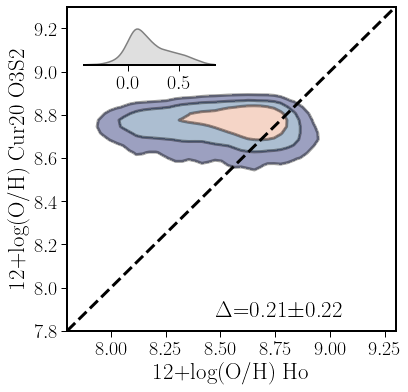

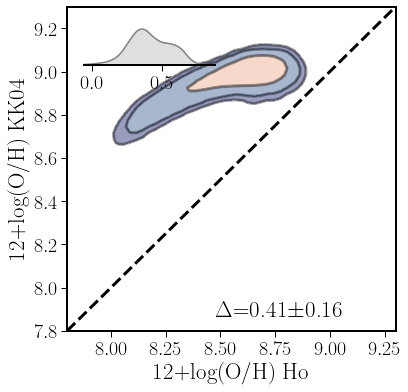

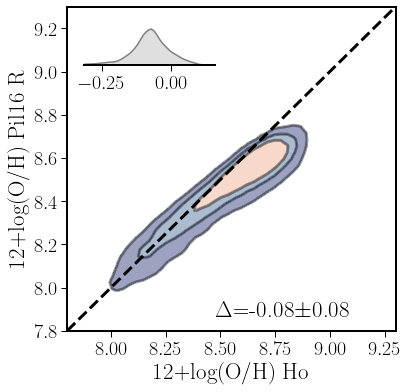

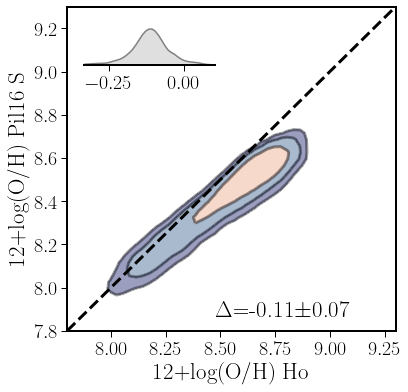

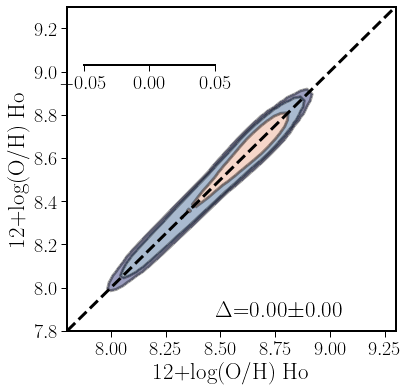

In [434]:
col=np.array(tab.colnames)
mask_OH = np.array(['OH' in x for x in col]) 
mask_Re = np.array(['Re_fit' in x for x in col]) 
mask_e  = np.array(['e_OH' not in x for x in col]) 
col_OH_Re=col[mask_OH & mask_Re & mask_e]
for OH_name in col_OH_Re:
    name_now = OH_name.replace('OH_','')
    name_now = name_now.replace('_Re_fit','')
    name_label = name_now.replace('_',' ')
    fig,ax,mean,std=comp_plot(x_par=tab['OH_Ho_Re_fit'],\
                              y_par=tab[OH_name],\
                              x_label=r'12+log(O/H) Ho',\
                              y_label=fr'12+log(O/H) {name_label}',\
                              c_main='black',scatter=0,alpha=0.4,x_min=7.8,x_max=9.3,\
                              offset=True,conts=[0.99,0.85,0.55,0])
    fig.tight_layout()
    name_file=f'comp_OH_Ho_{name_now}.pdf'
    fig.savefig(name_file, transparent=False, facecolor='white', edgecolor='white')#.pdf")
    print(OH_name,'|', name_now,'| ',name_file)


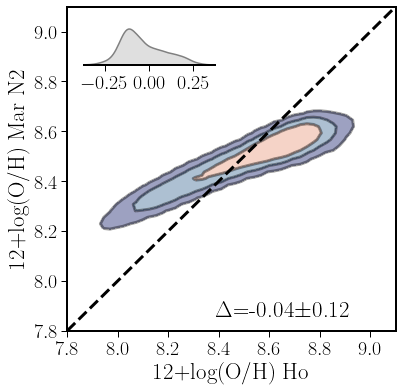

In [435]:
#scatter=0,alpha=0.4,x_min=0.15,x_max=0.99)
fig,ax,mean,std=comp_plot(x_par=tab['OH_Ho_Re_fit'],\
                       y_par=tab['OH_Mar13_N2_Re_fit'],\
          x_label=r'12+log(O/H) Ho',\
                       y_label=r'12+log(O/H) Mar N2',\
c_main='black',scatter=0,alpha=0.4,x_min=7.8,x_max=9.1,conts=[0.99,0.9,0.6,0])
#scatter=0,alpha=0.4,x_min=-0.1,x_max=8)#,conts=[0.9,0.6,0.3,0])

fig.tight_layout()
fig.savefig("comp_OH_Ho_Mar.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [436]:
#tab.add_column(tab['z_abs']+tab['r-z'],name='r_abs')

In [437]:
#
# Match galaxies
#

In [438]:
match_tab=astro.io.ascii.read('tables/match_manga.txt')
#print(match_tab)
#
#tab_matched=Table()
val=0
for name1,name2 in zip(match_tab['name1'],match_tab['name2']):
    name1='manga-'+name1
    name2='manga-'+name2
    t1=tab_all[tab_all['name']==name1]
    t2=tab_all[tab_all['name']==name2]
    if ((len(t1)==1) and (len(t2)==1)):
        t1.add_column(val,name='id')
        t2.add_column(val,name='id')        
        t_m=join(t1,t2,keys=['id'],join_type='left')
        if (val==0):
            tab_matched=t_m
        else:
            tab_matched=astro.table.vstack([tab_matched,t_m])
        val=val+1
print(val)


#print(tab_matched.columns)
#print(tab_matched['name1'])
        #    print(name1,len(t1),name2,len(t2))
#    print(name1,name2,t1,t2)
#    t_m = join(t1,t2)
#    print(t_m)
#tab[tab['name']=='10506-12702']
#tab[tab['name']=='10506-12702']



7


In [439]:
#nsa_sersic_n_morph
#tab_matched_mask = np.abs(tab_matched['r-i_1']-tab_matched['r-i_2'])>0.05
tab_matched_mask = np.abs(tab_matched['nsa_sersic_n_morph_1']-tab_matched['nsa_sersic_n_morph_2'])>1
print(tab_matched['name_1'][tab_matched_mask])

     name_1     
----------------
manga-9194-12702


In [440]:
tab_matched=tab_matched[~tab_matched_mask]

In [441]:
print(tab_matched['name_1'])

      name_1     
-----------------
manga-10506-12702
 manga-8952-12703
  manga-8983-3703
  manga-9872-1901
  manga-9872-3702
  manga-9872-3703


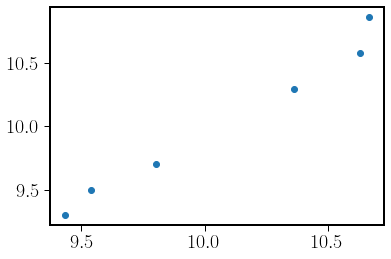

In [442]:
plt.scatter(tab_matched['log_Mass_1'],tab_matched['log_Mass_2'])

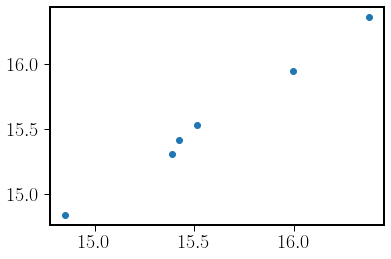

In [443]:
plt.scatter(tab_matched['r_band_mag_1'],tab_matched['r_band_mag_2'])

In [444]:
#tab_matched.add_column(tab_matched['z_abs']-tab_matched['z-r'],name='r_abs')

In [445]:
def get_diff(val):
    val1=val+'_1'
    val2=val+'_2'
    diff=tab_matched[val1]-tab_matched[val2]
    print(np.round(np.nanmean(diff),decimals=3),np.round(np.nanstd(diff),decimals=3))
    
def plot_diff(val):
    val1=val+'_1'
    val2=val+'_2'
    diff=tab_matched[val1]-tab_matched[val2]
    print(np.round(np.nanmean(diff),decimals=3),np.round(np.nanstd(diff),decimals=3))
    plt.scatter(tab_matched[val1],tab_matched[val2])
    plt.gca().set_aspect('equal', adjustable='box')
    
def plot_diff_log(val):
    val1=val+'_1'
    val2=val+'_2'
    diff=np.log10(np.abs(tab_matched[val1]))-np.log10(np.abs(tab_matched[val2]))
    print(np.round(np.nanmean(diff),decimals=3),np.round(np.nanstd(diff),decimals=3))
    plt.scatter(np.log10(np.abs(tab_matched[val1])),np.log10(np.abs(tab_matched[val2])))
    plt.gca().set_aspect('equal', adjustable='box')

In [446]:
get_diff('log_Mass')

0.032 0.105


In [447]:
get_diff('r_band_mag')

0.023 0.031


In [448]:
get_diff('g_band_mag')

0.049 0.035


In [449]:
get_diff('i_band_mag')

0.022 0.044


In [450]:
get_diff('u_band_mag')

0.071 0.048


In [451]:
get_diff('log_Mass_phot')

0.011 0.026


0.052 0.067


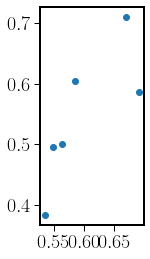

In [452]:
plot_diff_log('ML_avg')

In [453]:
get_diff('Age_LW_Re_fit')

-0.054 0.061


0.044 0.026


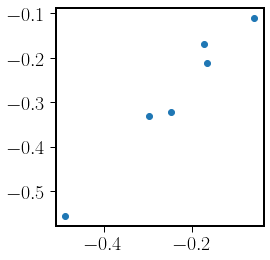

In [454]:
plot_diff('ZH_LW_Re_fit')

0.098 0.068


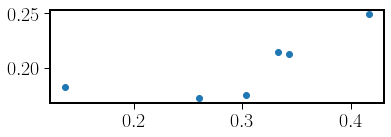

In [455]:
plot_diff('Av_ssp_Re')

-0.169 0.237


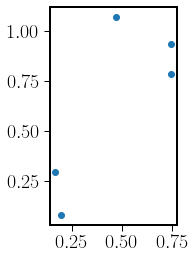

In [456]:
plot_diff('Av_gas_Re')

-0.05 0.067


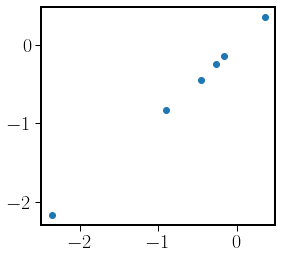

In [457]:
plot_diff_log('F_Ha_cen')

0.018 0.024


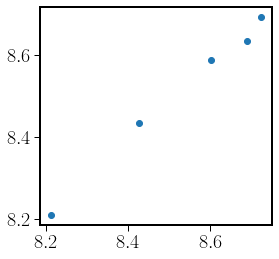

In [458]:
plot_diff('OH_Ho_Re_fit')

0.03 0.015


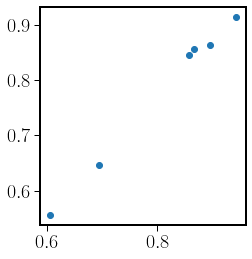

In [459]:
plot_diff('B-R')

-0.041 0.097


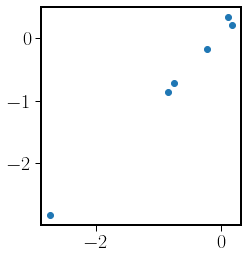

In [460]:
plot_diff('log_SFR_Ha')

0.159 0.138


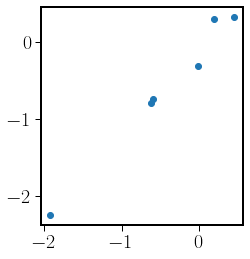

In [461]:
plot_diff('log_SFR_ssp')

0.013 0.027


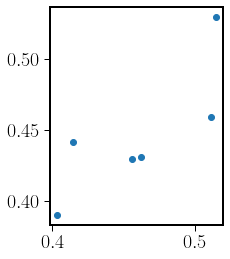

In [462]:
plot_diff_log('T80')

0.035 0.037


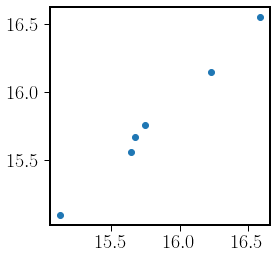

In [463]:
plot_diff('V_band_mag')

0.017 0.009


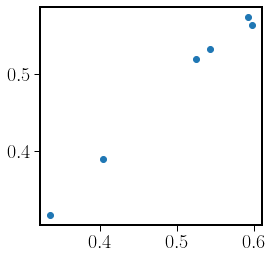

In [464]:
plot_diff('B-V')

0.03 0.015


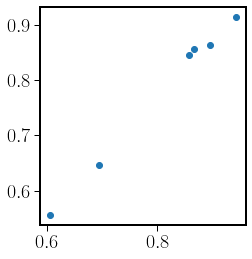

In [465]:
plot_diff('B-R')

In [466]:
#plot_diff('-r')

-0.024 0.054


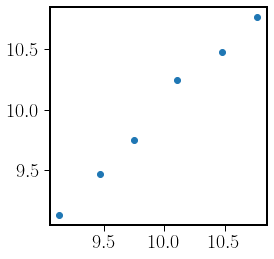

In [467]:
plot_diff('nsa_mstar')

0.008 0.052


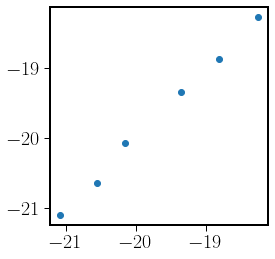

In [468]:
plot_diff('z_abs')

-0.141 0.316


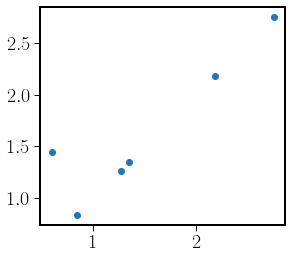

In [469]:
plot_diff('nsa_sersic_n_morph')

-17.478 22.906


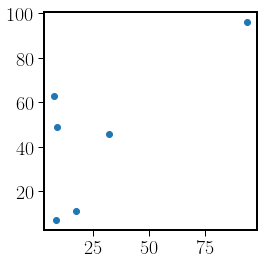

In [470]:
plot_diff('vel_disp_ssp_cen')

-49.994 106.993


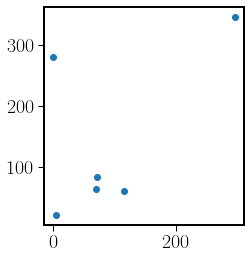

In [471]:
plot_diff('vel_ssp_1')

-5.756 12.871


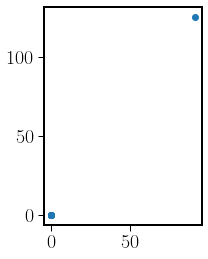

In [472]:
plot_diff('vel_ssp_2')

0.134 0.166


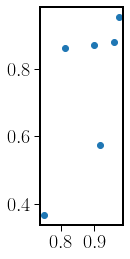

In [473]:
plot_diff('Lambda_Re')

-0.05 0.067


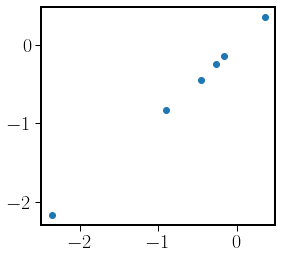

In [474]:
plot_diff_log('F_Ha_cen')

-0.065 0.128


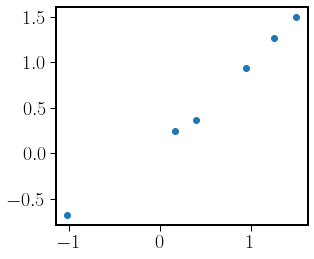

In [475]:
plot_diff_log('EW_Ha_cen')

0.006 0.032


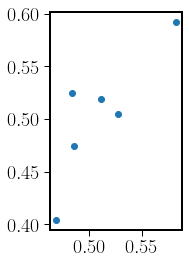

In [476]:
plot_diff_log('Ha_Hb_cen')

-0.036 0.083


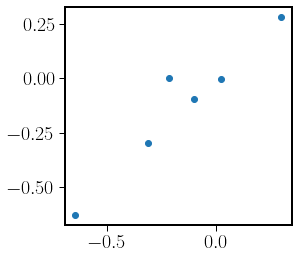

In [477]:
plot_diff('log_OIII_Hb_cen')

0.02 0.053


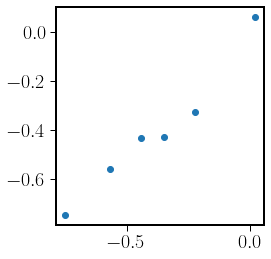

In [478]:
plot_diff('log_NII_Ha_cen')

-0.016 0.04


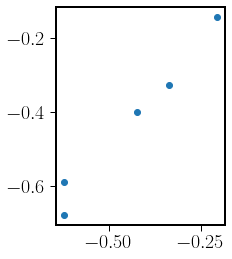

In [479]:
plot_diff('log_SII_Ha_cen')

-0.169 0.237


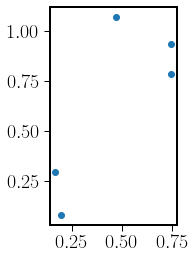

In [480]:
plot_diff('Av_gas_Re')

-0.041 0.097


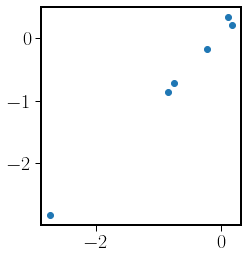

In [481]:
plot_diff('log_SFR_Ha')

-0.003 0.008


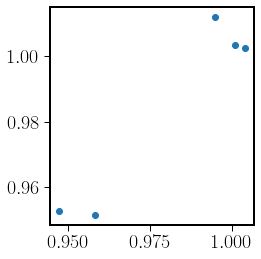

In [482]:
plot_diff_log('log_Mass_gas')

-0.035 0.356


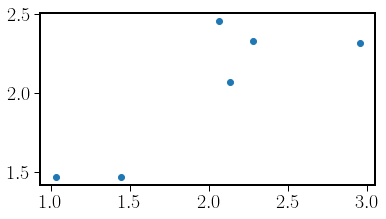

In [483]:
plot_diff('Fe5270_Re_fit')

0.352 0.51


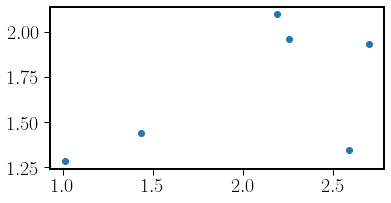

In [484]:
plot_diff('Fe5335_Re_fit')

0.115 0.35


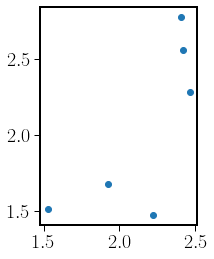

In [485]:
plot_diff('Mgb_Re_fit')

-0.038 0.362


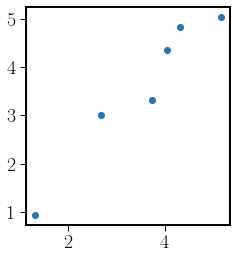

In [486]:
plot_diff('Hd_Re_fit')

0.048 0.247


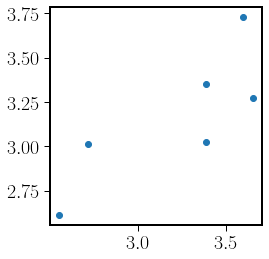

In [487]:
plot_diff('Hb_Re_fit')

-0.018 0.02


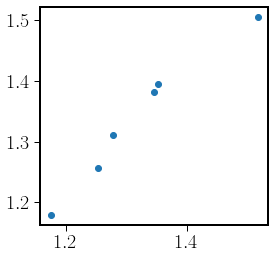

In [488]:
plot_diff('D4000_Re_fit1')

0.018 0.024


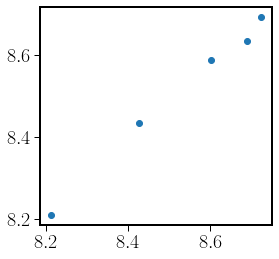

In [489]:
plot_diff('OH_Ho_Re_fit')

-0.004 0.022


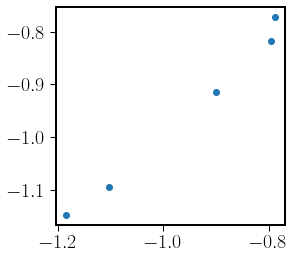

In [490]:
plot_diff('NO_Pil16_Ho_R_Re_fit')

-0.092 0.135


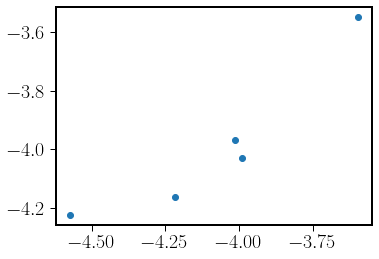

In [491]:
plot_diff('U_Mor16_O23_fs_Re_fit')

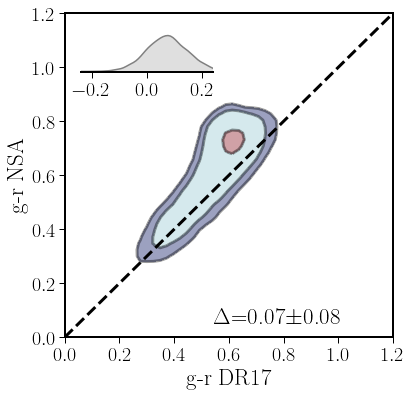

In [492]:
x_par=tab['g_band_mag']-tab['r_band_mag']#[mask_zeros]
y_par=tab['g-r']
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'g-r DR17',\
                       y_label=r'g-r NSA',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=1.2,conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_gr.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

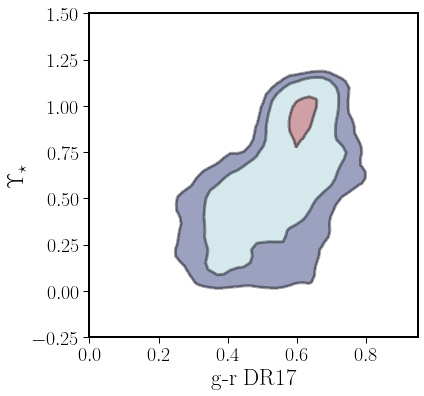

In [493]:
mask_now=tab['ML_avg']>1
x_par=tab['g_band_mag']-tab['r_band_mag']#[mask_zeros]
x_par=x_par[mask_now]
y_par=np.log10(tab['ML_avg'][mask_now])
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'g-r DR17',\
                       y_label=r'$\Upsilon_\star$',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=0.95,\
                          y_min=-0.25,y_max=1.5,equal=False,one=False,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_gr_ML.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

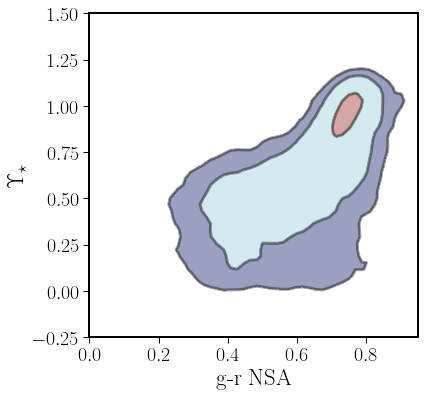

In [494]:
mask_now=tab['ML_avg']>1
x_par=tab['g-r']#[mask_zeros]
x_par=x_par[mask_now]
y_par=np.log10(tab['ML_avg'][mask_now])
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'g-r NSA',\
                       y_label=r'$\Upsilon_\star$',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=0.95,\
                          y_min=-0.25,y_max=1.5,equal=False,one=False,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_gr_NSA_ML.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

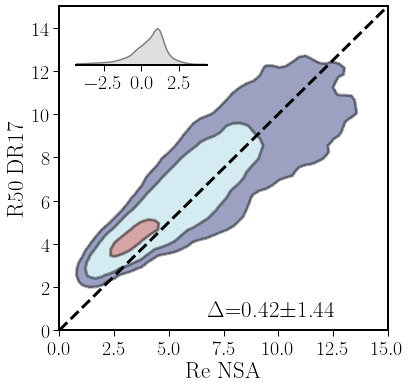

In [495]:
x_par=tab['Re_arc']#[mask_zeros]
y_par=tab['R50']
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'Re NSA',\
                       y_label=r'R50 DR17',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=15,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_Re_R50.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

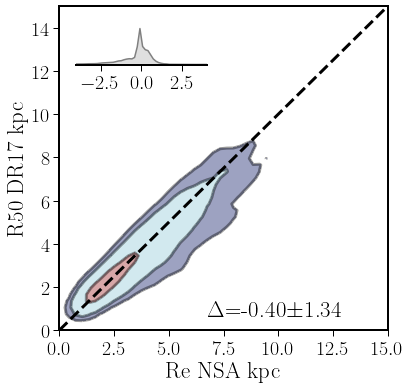

In [496]:
x_par=tab['Re_kpc']#[mask_zeros]
y_par=tab['R50_kpc_V']
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'Re NSA kpc',\
                       y_label=r'R50 DR17 kpc',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=15,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_Re_R50_kpc.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

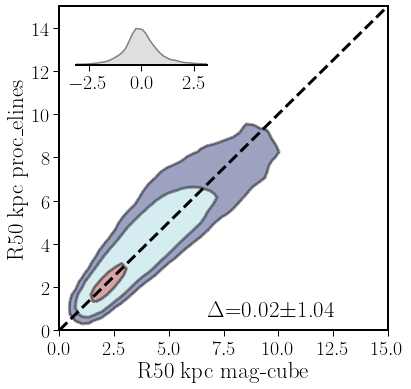

In [497]:
rat=tab['Re_kpc']/tab['Re_arc']
x_par=tab['R50']*rat/1.2
y_par=tab['R50_kpc_V']
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'R50 kpc mag-cube',\
                       y_label=r'R50 kpc proc\_elines',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=15,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_R50_kpc_val.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

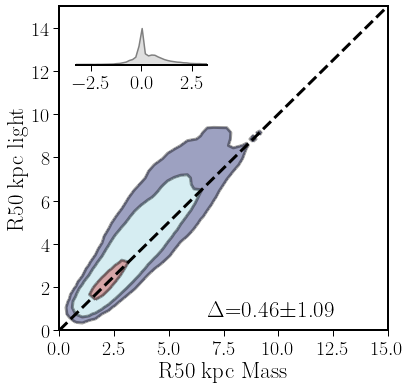

In [498]:
x_par=tab['R50_kpc_Mass']#[mask_zeros]
y_par=tab['R50_kpc_V']
fig,ax,mean,std=comp_plot(x_par=x_par,\
                       y_par=y_par,\
          x_label=r'R50 kpc Mass',\
                       y_label=r'R50 kpc light',
          c_main='black',scatter=0,alpha=0.4,x_min=0,x_max=15,\
                          conts=[0.95,0.8,0.15,0.0])#conts=[0.99,0.68,0.3,0])

fig.tight_layout()
fig.savefig("comp_R50_kpc.pdf", transparent=False, facecolor='white', edgecolor='white')#.pdf")

In [499]:
#V-band_SB_at_Re